## Py-imp is the section of the project that is implemented using Python
This notebook is the Explainable Machine Learning section for "traditional" machine learning models

In [1]:
# Warning options (before all imports)
import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=FutureWarning)
# %xmode Verbose # simplified traceback when an exception occurs
%xmode Plain

Exception reporting mode: Plain


### Install needed packages


In [2]:
# Install a conda package in the current Jupyter kernel
import sys
# !mamba install -c conda-forge --yes --prefix {sys.prefix} <pkg>
# !conda install -c conda-forge --yes --prefix {sys.prefix} <pkg>

# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} - m pip install <pkg>

In [3]:
# 'sklearn for Time series data'
# !mamba install -c conda-forge --yes --prefix {sys.prefix} sktime-all-extras
# 'for Time series data'
# !mamba install -c conda-forge --yes --prefix {sys.prefix} feature_engine
# !mamba install -c conda-forge --yes --prefix {sys.prefix} mlxtend
# !mamba install -c conda-forge --yes --prefix {sys.prefix} statsmodels
# !mamba install -c conda-forge --yes --prefix {sys.prefix} ptitprince
# for XAI data dimension
# !mamba install -c conda-forge --yes --prefix {sys.prefix} deepchecks
# for XAI feature attribution
# !mamba install -c conda-forge --yes --prefix {sys.prefix} shap
# for XAI counterfactuals
# !mamba install -c conda-forge --yes --prefix {sys.prefix} dice-ml

# for tf.keras.utils.plot_model
# !mamba install -c conda-forge --yes --prefix {sys.prefix} graphviz python-graphviz

# # upgrade pip
# !{sys.executable} -m pip install --upgrade pip

# # Debug pip
# # Uninstall SetupTools:
# !{sys.executable} -m pip uninstall pip setuptools
# # Reinstall Setuptools:
# !{sys.executable} -m pip install --upgrade setuptools

# feature engineering Time series data
# !{sys.executable} -m pip install tsfresh
# pretty Matplotlib plots
# !{sys.executable} -m pip install git+https://github.com/iammelvink/LovelyPlots
# better progress bar
# !{sys.executable} -m pip install rich
# better 'describe'
# !{sys.executable} -m pip install skimpy
# For size encoded heatmaps
# !{sys.executable} -m pip install heatmapz
# XGBoost
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost
# !{sys.executable} -m pip install fastprogress
# !{sys.executable} -m pip install matplotx[all]
# !{sys.executable} -m pip install matplotx
# !{sys.executable} -m pip install lux
# !jupyter nbextension install --py luxwidget
# !jupyter nbextension enable --py luxwidget

# !{sys.executable} -m pip install sweetviz
# !{sys.executable} -m pip install yellowbrick
# !{sys.executable} -m pip install autoviz
# !{sys.executable} -m pip install pandas-profiling
# !{sys.executable} -m pip install dtale
# !{sys.executable} -m pip install sketch
# !{sys.executable} -m pip install watermark
# !{sys.executable} -m pip install snoop
# for tf.keras.utils.plot_model
# !{sys.executable} -m pip install pydot
# for optimising hyperparameters
# !{sys.executable} -m pip install optuna
# to save models to files
# !{sys.executable} -m pip install joblib
# for creating visualisations of model architectures
# !{sys.executable} -m pip install git+https://github.com/paulgavrikov/visualkeras
# !{sys.executable} -m pip install git+https://github.com/RedaOps/ann-visualizer
# !{sys.executable} -m pip install visualkeras

# for feature selection
# !{sys.executable} -m pip install Boruta
# for feature selection BorutaShap
# !{sys.executable} -m pip install git+https://github.com/Ekeany/Boruta-Shap
# !{sys.executable} -m pip install BorutaShap
# for feature selection using SHAP
# !{sys.executable} -m pip install shap-hypetune
# to export .ipynb to .pdf
# !{sys.executable} -m pip install nbconvert
# !{sys.executable} -m pip install adjustText
# to save models to files
# !mamba install -c conda-forge --yes --prefix {sys.prefix} h5py==3.9.0 --force-reinstall
# !{sys.executable} -m pip install h5py==3.9.0 --force-reinstall

# !{sys.executable} -m pip install matplotlib --force-reinstall
# !{sys.executable} -m pip install matplotlib pandas==1.5.3 --force-reinstall

In [4]:
# %pip install <pkg> --user

### Importing libraries


In [5]:
import snoop

snoop.install()
%load_ext snoop
# eg. put this before debug code %%snoop

from skimpy import skim  # better describe
from rich.progress import track
import os, random
from io import BytesIO
import timeit

import math
from scipy.stats import chi2_contingency

# Dataset reducer
# Source: https://www.kaggle.com/code/joseguzman/reducing/notebook
from reducing import PandaReducer

# Local ChatGPT-ish
import sketch
os.environ["SKETCH_MAX_COLUMNS"] = "300"
os.environ["SKETCH_ROW_OVERRIDE_LIMIT"] = "5"

# Run locally
# os.environ["LAMBDAPROMPT_BACKEND"] = "StarCoder"
# os.environ["SKETCH_USE_REMOTE_LAMBDAPROMPT"] = "False"
# os.environ["HF_ACCESS_TOKEN"] = "your_hugging_face_token"

# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cycler
from matplotlib import rcParams
# matplotlib extensions
import matplotx
# For better distribution plots
# import ptitprince as pt
# For size encoded heatmaps
from heatmap import *
# from adjustText import adjust_text

# Pre-processing
from sklearn.preprocessing import *
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import DropMissingData
from feature_engine.selection import DropFeatures
from feature_engine.timeseries.forecasting import *
from mlxtend.evaluate.time_series import *
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *
from sklearn.compose import *
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import *
import itertools

# Modeling
import tensorflow as tf
from tensorflow.keras.utils import *
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import *
from sklearn.model_selection import *
from sktime.utils.plotting import plot_series
from sklearn.utils import *
from sklearn.ensemble import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from sklearn import metrics
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.svm import *
from xgboost import *
from lightgbm import *
from catboost import *
from sklearn.utils.class_weight import *
from sklearn.exceptions import NotFittedError

# To save models to files
# import pickle
import joblib # for saving models to .pkl or.sav files, for scikit-learn models
import h5py # for saving models to .hdf5 files, for TensorFlow models
from tensorflow.keras.models import *
# saved_model = load_model('model_name.hdf5')

# for optimising hyperparameters
import optuna
# to visualise of model architectures
# import visualkeras
# from ann_visualizer.visualize import ann_viz;
from shaphypetune import *

# for XAI data dimension
from deepchecks.tabular import *
from deepchecks.tabular.suites import *
from deepchecks.tabular.checks import *
# for XAI feature attribution
import shap
# print the JS visualization code to the notebook
shap.initjs()
# for XAI counterfactuals
import dice_ml
from dice_ml import Dice

from IPython.display import display

np.set_printoptions(linewidth=140)

# Pandas options
# pd.options.display.precision = 3
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50
pd.options.mode.chained_assignment=None

pd.set_option('display.width', 140)

# Display Pipelines and models
from sklearn import set_config
set_config(display='diagram')

plt.style.reload_library()
# plt.style.use(matplotx.styles.dufte)
# plt.style.use('ipynb') # prettier plots
plt.style.use(['ipynb', 'colors10-markers'])
# Always put after custom styles
rcParams['axes.spines.top'] = False # remove top border of plot
rcParams['axes.spines.bottom'] = True # keep top border of plot
rcParams['axes.spines.left'] = True # keep top border of plot
rcParams['axes.spines.right'] = True # keep top border of plot
# rcParams['axes.grid' ] = True
rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # reset figsize

# To display charts in Jupyter
%matplotlib inline

# Matplotlib options
rcParams['figure.dpi'] = 600
# rcParams['figure.figsize'] = 8, 6
rcParams['legend.fontsize'] = "large"
rcParams['xtick.major.size'] = 4
rcParams['xtick.minor.size'] = 1
rcParams["figure.autolayout"] = True

# For reproducibility
# rng = np.random.RandomState(0)
rng = 777
os.environ['PYTHONHASHSEED'] = str(rng)
random.seed(rng)
np.random.seed(rng)
tf.random.set_seed(rng)

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(rng)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
# tf.config.experimental.enable_op_determinism()
os.environ['TF_DETERMINISTIC_OPS'] = "True"
os.environ["TF_DISABLE_SEGMENT_REDUCTION_OP_DETERMINISM_EXCEPTIONS"] = "True"

%load_ext autoreload
%autoreload 2

deepchecks - WARNING - You are using deepchecks version 0.17.4, however a newer version is available. Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


In [6]:
%load_ext watermark
# %watermark
%watermark --iversions

optuna    : 3.3.0
pandas    : 1.5.3
matplotlib: 3.7.1
sklearn   : 1.3.1
scipy     : 1.10.1
h5py      : 3.9.0
seaborn   : 0.11.0
matplotx  : 0.3.10
joblib    : 1.3.2
shap      : 0.42.1
numpy     : 1.23.5
hyperopt  : 0.2.5
dice_ml   : 0.10
tensorflow: 2.10.1
sketch    : 0.4.2
xgboost   : 2.0.0
sys       : 3.8.17 | packaged by conda-forge | (default, Jun 16 2023, 07:01:59) [MSC v.1929 64 bit (AMD64)]
keras     : 2.10.0



In [7]:
# Helper functions for categorical type casting
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()]
            for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels',
                                    'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def return_categoricals(df, threshold=5):
    """
        Returns a list of columns that have less than or equal to
        `threshold` number of unique categorical levels
    """
    return list(filter(lambda c: c if len(df[c].unique()) <= threshold else None,
                       df.columns))


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [8]:
# allow memory growth of GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

<a id="import-and-clean-data"></a>
## 1.   Import and Clean Data

In [9]:
data_path = "../../data/d_pump_cleaned/"

df_pdm_pump = PandaReducer().reduce(
    pd.read_csv(f"{data_path}/final_pdm_pump_cleaned.csv", parse_dates=["datetime"]))

# # Changing format's of date-time columns. Sort based on date for better readability
tables = [df_pdm_pump]
for dataset in tables:
    dataset.sort_values(["datetime"],
    inplace=True, ignore_index=True)

Dataset reduced 51.36% : 354.02 to 172.21 MB in 3.62 seconds


In [10]:
to_cast = return_categoricals(df_pdm_pump, threshold=5)
df_pdm_pump = to_categorical(to_cast, df_pdm_pump)
df_pdm_pump.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218880 entries, 0 to 218879
Data columns (total 212 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    datetime                  datetime64[ns]
 1    sensor_00                 float32       
 2    sensor_01                 float32       
 3    sensor_02                 float32       
 4    sensor_03                 float32       
 5    sensor_04                 float32       
 6    sensor_05                 float32       
 7    sensor_06                 float32       
 8    sensor_07                 float32       
 9    sensor_08                 float32       
 10   sensor_09                 float32       
 11   sensor_10                 float32       
 12   sensor_11                 float32       
 13   sensor_12                 float32       
 14   sensor_13                 float32       
 15   sensor_14                 float32       
 16   sensor_16                 float32   

In [11]:
print(f"Summary for DataFrame: df_pdm_pump")
summarize_categoricals(df_pdm_pump, show_levels=True)

Summary for DataFrame: df_pdm_pump


Levels  No. of Levels  No. of Missing Values
datetime     [2018-04-02T00:00:00.000000000, 2018-04-02T00:...         218880                      0
sensor_00    [2.459491, 2.449653, 2.46441, 2.444734, 2.4407...           1245                      0
sensor_01    [45.83333, 45.74652, 45.61632, 45.65972, 45.78...            698                      0
sensor_02    [52.34375, 52.30035, 52.38715, 52.343746, 52.4...            686                      0
sensor_03    [44.791664, 44.79166, 44.87847, 44.92188, 44.9...            492                      0
...                                                        ...            ...                    ...
month_sin    [1.224647e-16, -7.071068e-01, -1.000000e+00, -...              4                      0
month_cos         [-1, 0, 1]
Categories (3, int64): [-1, 0, 1]              3                      0
hour_sin                        [0]
Categories (1, int64): [0]              1                      0
hour_cos     [1.0, 0.96291727, 0.8544194, 0.6825532, 0.4600...             12                      0
pump_status  ['normal', 'broken', 'recovering']
Categories ...              3                      0

[212 rows x 3 columns]

Descriptive statistics for df_pdm_pump data

In [12]:
print("Total number of df_pdm_pump records: %d" % len(df_pdm_pump.index))
print(df_pdm_pump.head(3))
# skim(df_pdm_pump)
df_pdm_pump.describe().T.style.background_gradient(axis=0, cmap='YlOrRd')

Total number of df_pdm_pump records: 218880
             datetime  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0 2018-04-02 00:00:00   2.459491  45.833328   52.34375  44.791664  639.583313  78.575813   13.09317  16.167530   15.49479   15.11863   
1 2018-04-02 00:01:00   2.459491  45.833328   52.34375  44.791664  639.583313  78.575813   13.09317  16.167530   15.49479   15.11863   
2 2018-04-02 00:02:00   2.449653  45.746521   52.30035  44.791664  634.838013  79.064934   13.12211  16.131359   15.56713   15.11863   

   sensor_10  sensor_11  sensor_12  sensor_13   sensor_14   sensor_16   sensor_17  sensor_18   sensor_19   sensor_20   sensor_21  \
0  39.106178  48.769089  34.889641   1.630659  419.414490  462.781006  458.733002   2.510471  664.629211  399.444794  880.046570   
1  39.106178  48.769089  34.889641   1.630659  419.414490  462.781006  458.733002   2.510471  664.629211  399.444794  880.046570   
2  39.541698  4

In [13]:
# Duration of the df_pdm_pump data
print("Duration of the df_pdm_pump data:")
df_pdm_pump.datetime.min(), df_pdm_pump.datetime.max()

Duration of the df_pdm_pump data:


(Timestamp('2018-04-02 00:00:00'), Timestamp('2018-08-31 23:59:00'))

<a id="data-preprocessing"></a>
## 4.   Data Preprocessing

Data needs to be one-hot-encoded before applying machine learning models.

#### Using first 20000 to experiment with

In [14]:
# Using first 20000 to experiment with
# df_pdm_pump = df_pdm_pump.iloc[:20000]

In [15]:
# Drop datatime because this is a prediction and not forecasting
df_pdm_pump.drop(['datetime'], axis=1, inplace=True)

In [16]:
# reduce size of the dataframe
df_pdm_pump = PandaReducer().reduce(df_pdm_pump)
df_pdm_pump.info()

Dataset reduced 0.00% : 169.92 to 169.91 MB in 1.26 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218880 entries, 0 to 218879
Columns: 211 entries, sensor_00 to pump_status
dtypes: category(6), float32(201), int8(4)
memory usage: 169.9 MB


In [17]:
X = df_pdm_pump.iloc[:, :-1]
# X = df_pdm_pump.drop(['datetime'], axis=1).iloc[:, :-1]
y = df_pdm_pump['pump_status']

#### Features before feature selection

In [18]:
X.shape

(218880, 210)

In [19]:
X.head(3)

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  \
0   2.459491  45.833328   52.34375  44.791664  639.583313  78.575813   13.09317  16.167530   15.49479   15.11863  39.106178  48.769089   
1   2.459491  45.833328   52.34375  44.791664  639.583313  78.575813   13.09317  16.167530   15.49479   15.11863  39.106178  48.769089   
2   2.449653  45.746521   52.30035  44.791664  634.838013  79.064934   13.12211  16.131359   15.56713   15.11863  39.541698  49.363251   

   sensor_12  sensor_13   sensor_14   sensor_16   sensor_17  sensor_18   sensor_19   sensor_20   sensor_21   sensor_22   sensor_23  \
0  34.889641   1.630659  419.414490  462.781006  458.733002   2.510471  664.629211  399.444794  880.046570  451.345398  948.018677   
1  34.889641   1.630659  419.414490  462.781006  458.733002   2.510471  664.629211  399.444794  880.046570  451.345398  948.018677   
2  34.707630   1.698600  420.712189  465.388214  465.173187   2.568181  666.649170  400.791595  882.583984  451.393005  952.205505   

    sensor_24   sensor_25  ...  sensor_30_window_3H_mean  sensor_31_window_3H_mean  sensor_32_window_3H_mean  sensor_33_window_3H_mean  \
0  626.647583  738.939026  ...                657.932068                751.339661                702.056885                459.833740   
1  626.647583  738.939026  ...                657.605469                751.458313                701.966248                459.883362   
2  630.678101  737.267883  ...                657.710876                751.602966                702.071472                459.864624   

   sensor_34_window_3H_mean  sensor_35_window_3H_mean  sensor_36_window_3H_mean  sensor_37_window_3H_mean  sensor_38_window_3H_mean  \
0                167.040268                326.382812                200.904358                103.390602                 44.231770   
1                167.014343                326.266174                200.896667                103.427429                 44.244789   
2                166.991486                326.175201                200.901489                103.588646                 44.249130   

   sensor_39_window_3H_mean  sensor_40_window_3H_mean  sensor_41_window_3H_mean  sensor_42_window_3H_mean  sensor_43_window_3H_mean  \
0                 31.889465                 65.983795                 31.041666                 31.176214                 38.136570   
1                 31.882233                 65.918686                 31.041666                 31.176214                 38.107635   
2                 31.864870                 65.882523                 31.041666                 31.176214                 38.091721   

   sensor_44_window_3H_mean  sensor_45_window_3H_mean  sensor_46_window_3H_mean  sensor_47_window_3H_mean  sensor_48_window_3H_mean  \
0                 45.298031                 44.645382                 40.049511                 37.763630                191.173157   
1                 45.256237                 44.701645                 40.041473                 37.760414                190.951324   
2                 45.206406                 44.748264                 40.038258                 37.758808                190.740738   

   sensor_49_window_3H_mean  sensor_51_window_3H_mean     month_sin  month_cos  hour_sin  hour_cos  
0                 77.284271                220.801178  1.224647e-16         -1         0       1.0  
1                 77.363037                220.791534  1.224647e-16         -1         0       1.0  
2                 77.445023                220.791534  1.224647e-16         -1         0       1.0  

[3 rows x 210 columns]

#### Load trained feature selection model for modelling phase

In [20]:
# # load the model from disk
filename = '../../code/pump/models/four_phase_selector.sav'
boruta_shap_selector = joblib.load(open(filename, 'rb'))

In [21]:
X_reduced = boruta_shap_selector.Subset()

In [22]:
# print(boruta_shap_selector.Subset().columns)

In [23]:
col_list = X_reduced.columns.tolist()

#### Apply feature selection

In [24]:
X = X.loc[:, col_list]

In [25]:
X.shape

(218880, 4)

In [26]:
X.head(3)

sensor_11_window_3H_mean  sensor_12_window_3H_mean  sensor_05  sensor_10_window_3H_mean
0                 49.143627                 35.166382  78.575813                 40.335556
1                 49.148724                 35.173748  78.575813                 40.352913
2                 49.155159                 35.185909  79.064934                 40.376858

In [27]:
# OR, load CSV file with list of features to keep
# features_to_keep = pd.read_csv("../../code/pump/models/features_to_keep.csv", header=None)
# features_to_keep = features_to_keep.values.tolist()

In [28]:
# print(len(features_to_keep))

In [29]:
# features_to_keep

<a id="train-test-split"></a>
### 4.1.   Train-Test split
CatBoost classifier does not require any knd of preprocessing while Naive bayes requires a different kind of preprocesing. Therefore, we will use raw/ unmodified data (`X_train_cat, X_test_cat, y_train_cat, y_test_cat`) for CatBoost and preprocessed data (`X_train, X_test, y_train, y_test`) for all other classifiers. For Naive Bayes, we will use the raw data (`X_train_cat, X_test_cat, y_train_cat, y_test_cat`) and preprocess it as required in the Naive Bayes section.

In [30]:
categorical_columns = list(X.select_dtypes(include='category').columns)
numeric_columns = list(X.select_dtypes(exclude='category').columns)

In [31]:
data_splits = temporal_train_test_split(X, y, test_size=0.30)
X_train, X_test, y_train, y_test = data_splits

# For CatBoost and Naive Bayes
data_splits = temporal_train_test_split(X, y, test_size=0.30)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = data_splits

list(map(lambda X: X.shape, [X, y, X_train, X_test, y_train, y_test]))

[(218880, 4), (218880,), (153216, 4), (65664, 4), (153216,), (65664,)]

In [32]:
# fig, ax = plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [33]:
pd.Series(y).value_counts()

normal        204396
recovering     14477
broken             7
Name: pump_status, dtype: int64

In [34]:
plt.figure(figsize=(15, 10))
ax = pd.Series(y).value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Pump status')
plt.title('Count and percentage of each Pump status')
total = pd.Series(y).count()
for p in ax.patches:
    count = p.get_height()
    percent = '{:.3f}%'.format(100 * count / total)
    ax.annotate(str(count) + '\n' + percent + '\n', (p.get_x() + p.get_width() / 2., p.get_height()),
                va='center', ha='center', fontweight='bold', 
                color='#000', xytext=(0, 10), textcoords='offset points')
plt.show();

<a id="preprocessing-pipeline%3A-one-hot-encoding%2C-standardization"></a>
### 4.2.   Preprocessing Pipeline: One-hot Encoding, Standardization
We need to standardize the continuous or quantitative variables/ features before applying Machine Learning models. This is important because if we don't standardize the features, features with high variance that are orders of magnitude larger that others might dominate the model fitting process and causing the model unable to learn from other features (with lower variance) correctly as expected. <br/>
There is no need to standardize categorical variables.

To know which algorithms require standardization/ feature scaling read this useful [stackoverflow post](https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm).

***Also we need to standardize the data only after performing train-test split because if we standardize before splitting then there is a chance for some information leak from the test set into the train set. We always want the test set to be completely new to the ML models. [Read more](https://scikit-learn.org/stable/modules/compose.html#columntransformer-for-heterogeneous-data)***

In [35]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', dtype=np.int8))]) # np.int8 = 0 to 255, 1 byte. ONLY POSITIVE INTEGERS

## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
    remainder='passthrough')

## Applying Column Transformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Label encoding
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)

In [36]:
# Save feature names after one-hot encoding for feature importances plots
try:
    # if no error occurs
    feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
    feature_names = numeric_columns + feature_names
# if an error occurs, get the feature_names from X
except:
    feature_names = list(X.columns)

#### Features after feature selection

In [37]:
print(feature_names)
print(len(feature_names))

['sensor_11_window_3H_mean', 'sensor_12_window_3H_mean', 'sensor_05', 'sensor_10_window_3H_mean']
4


In [38]:
list(map(lambda X: X.shape, [X, y, X_train, X_test, y_train, y_test]))

[(218880, 4), (218880,), (153216, 4), (65664, 4), (153216,), (65664,)]

<a id="data-modeling"></a>
## 5.   Data Modeling
Since the dataset is imbalanced we will be using class-weighted/ cost-sensitive learning. In cost-sensitive learning, a weighted cost function is used. Therefore, misclassifying a sample from the minority class will cost the classifiers more than misclassifying a sample from the majority class. In most of the Sklearn classifiers, cost-sensitive learning can be enabled by setting `class_weight='balanced'`.

<a id="utility-functions"></a>
### 5.1.   Utility Functions

In [39]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """

    # labels = labels if labels else pd.Series(y).unique()
    labels = pd.Series(y).unique()
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='YlOrRd', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
      # Plot the text on each cell
    # for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    #     plt.text(j, i, f"{matrix[i, j]} ({matrix[i, j]*100:.1f}%)",
    #             horizontalalignment="center")
    plt.close()
    
    return fig

In [40]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """

    # Plotting ROC curve for multi-class classification not working yet
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = roc_auc_score(y_true, y_probs, multi_class='ovr', average='weighted')
    # auc = round(roc_auc_score(y_true, y_probs, multi_class='ovr', average='weighted'), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis,
                 estimator=None, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [41]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    # Plotting Precision-Recall curve for multi-class classification not working yet
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, estimator=None,
                     ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, estimator=None,
                     color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bboX_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [42]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [43]:
def train_clf(clf, X_train, y_train, sample_weight=None, neural_net=False, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(X_train)
        
        # For neural nets
        if neural_net:
            y_pred_train = y_pred_train.argmax(axis=1) # to get the highest number in the prediction probabilities list
        
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(X_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(X_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(X_train)
    # print(len(y_pred_train))
    # print(y_pred_train.shape)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [44]:
def model_memory_size(clf):
    # This function returns the size of the model in Bytes
    buffer = BytesIO()
    joblib.dump(clf, buffer, compress=0) # compress=0 because it's faster (no compression)
    return sys.getsizeof(buffer.getvalue())

In [45]:
def save_ml_model(clf, filename):
    # This function saves the model to a file using joblib
    with open(filename, "wb") as f:
        joblib.dump(clf, f, compress=3) # compress=3 is the default and highest compression

In [46]:
def report(clf, X_train, y_train, X_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, neural_net=False,
           verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, X_train, y_train,
                                      sample_weight=sample_weight,
                                      neural_net=neural_net,
                                      refit=refit) # error here
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(X_test)
    end = timeit.default_timer()
    test_time = end - start
    
    # For neural nets
    if neural_net:
        y_probs = np.copy(test_predictions)
        test_predictions = y_probs.argmax(axis=1) # to get the highest number in the prediction probabilities list
    else:
        y_probs = clf.predict_proba(X_test)
    test_acc = accuracy_score(y_test, test_predictions)
    roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted') # ovr = one vs rest, ovo = one vs one
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions, average='weighted'), func(y_test, test_predictions, average='weighted')]
        
    ## Save model and get memory size
    model_mem = None
    if not neural_net:
        ## Save model to disk
        # clf_name = clf.__class__.__name__ # Get the model name
        # timestamp = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') # change this to your preferred format
        # model_path = '../../code/pump/models/'
        # file_name = os.path.join(model_path, f'{clf_name}_{timestamp}.sav') # concatenate the model name and timestamp with .h5 extension
        # save_ml_model(clf, file_name)
        
        ## Get the model memory size
        model_mem = model_memory_size(clf) / 1024
        # model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {X_train.shape[0]} samples")
    print(f" Test Size: {X_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {train_time} seconds")
    print(f" Testing Time: {test_time} seconds")
    # print(f"Training Time: {round(train_time, 3)} seconds")
    # print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))   
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions), labels=confusion_labels))
        # print("\n=======================================> PLOTS <=========================================")

        ## Variable importance plot
        # fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        # # roc_axes = axes[0, 0]
        # # pr_axes = axes[0, 1]
        # importances = None

        # if importance_plot:
        #     if not feature_labels:
        #         raise RuntimeError("'feature_labels' argument not passed "
        #                            "when 'importance_plot' is True")

        #     try:
        #         importances = pd.Series(clf.feature_importances_,
        #                                 index=feature_labels) \
        #                         .sort_values(ascending=False)
        #     except AttributeError:
        #         try:
        #             importances = pd.Series(clf.coef_.ravel(),
        #                                     index=feature_labels) \
        #                             .sort_values(ascending=False)
        #         except AttributeError:
        #             pass

        #     if importances is not None:
        #         # Modifying grid
        #         grid_spec = axes[0, 0].get_gridspec()
        #         for ax in axes[:, 0]:
        #             ax.remove()   # remove first column axes
        #         large_axs = fig.add_subplot(grid_spec[0:, 0])

        #         # Plot importance curve
        #         feature_importance_plot(importances=importances.values,
        #                                 feature_labels=importances.index,
        #                                 ax=large_axs)
        #         large_axs.axvline(x=0)

        #         # Axis for ROC and PR curve
        #         # roc_axes = axes[0, 1]
        #         # pr_axes = axes[1, 1]
        #     else:
        #         # remove second row axes
        #         for ax in axes[1, :]:
        #             ax.remove()
        # else:
        #     # remove second row axes
        #     for ax in axes[1, :]:
        #         ax.remove()

        ## ROC and Precision-Recall curves
        # clf_name = clf.__class__.__name__
        # roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        # precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        # fig.subplots_adjust(wspace=5)
        # fig.tight_layout()
        # display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [47]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='f1-score'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """
    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'Train Accuracy', 'Test Accuracy', 'Test ROC-AUC']
            #  'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        scores = clf_reports[i][score]
        # scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        train_acc = clf_reports[i]['accuracy'][0]
        test_acc = clf_reports[i]['accuracy'][1]
        
        # Get metrics of True Positive class from sklearn classification_report
        # true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], train_acc, test_acc, roc_auc]
        # table[clf_names[i]] = scores + [scores[1] < scores[0], test_acc, roc_auc] + true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    ## Compare Plots
    # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # # ROC and Precision-Recall
    # for i in range(len(clf_reports)):
    #     clf_probs = clf_reports[i]['test_probs']
    #     roc_plot(y_test, clf_probs, label=clf_names[i],
    #              compare=True, ax=axes[0])
    #     precision_recall_plot(y_test, clf_probs, label=clf_names[i],
    #                           compare=True, ax=axes[1])
    # # Plot No-Info classifier
    # axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    # fig.tight_layout()
    # plt.close()
    
    # return table.T, fig
    return table.T

### Set primary metric to be used

In [48]:
# primary_eval_metric = metrics.accuracy_score
primary_eval_metric = metrics.f1_score

In [49]:
confusion_lbs = pd.Series(y).unique()
print(confusion_lbs)

['normal', 'broken', 'recovering']
Categories (3, object): ['broken', 'normal', 'recovering']


#### Load trained ML model

In [50]:
# load the model from disk
filename = '../../code/pump/models/AdaBoostClassifier_2023.sav'
adaboot = joblib.load(open(filename, 'rb'))

In [51]:
# adaboot, adaboot_report = report(adaboot, X_train, y_train,
#                                  X_test, y_test,
#                                  display_scores=[primary_eval_metric],
#                                  refit=False,
#                                  importance_plot=False,
#                                  feature_labels=feature_names,
#                                  confusion_labels=confusion_lbs)

In [52]:
# report_list = [
# adaboot_report
# ]
# clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]

In [53]:
# compare_table = compare_models(y_test, clf_reports=report_list,
#                                              labels=clf_labels,
#                                              score=primary_eval_metric.__name__)
# compare_table.sort_values(by=['Test f1_score', 'Overfitting'], ascending=[False, False])

<a id="xai"></a>
### 5.2. Explainable Machine Learning

In [54]:
# Get target variable
target_variable = df_pdm_pump.columns[-1]

In [55]:
df_pdm_pump.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218880 entries, 0 to 218879
Data columns (total 211 columns):
 #    Column                    Dtype   
---   ------                    -----   
 0    sensor_00                 float32 
 1    sensor_01                 float32 
 2    sensor_02                 float32 
 3    sensor_03                 float32 
 4    sensor_04                 float32 
 5    sensor_05                 float32 
 6    sensor_06                 float32 
 7    sensor_07                 float32 
 8    sensor_08                 float32 
 9    sensor_09                 float32 
 10   sensor_10                 float32 
 11   sensor_11                 float32 
 12   sensor_12                 float32 
 13   sensor_13                 float32 
 14   sensor_14                 float32 
 15   sensor_16                 float32 
 16   sensor_17                 float32 
 17   sensor_18                 float32 
 18   sensor_19                 float32 
 19   sensor_20            

Prep for Counterfactuals and needed for Data checks

Create **df_train** (A dataframe of training set values)

In [56]:
# Convert y_train to a DataFrame with column name target_variable
y_train_df = pd.DataFrame({target_variable: y_train})

# Combine X_train and y_train_df, while setting X_train column names to feature_names
df_train = pd.concat([pd.DataFrame(X_train, columns=feature_names), y_train_df], axis=1)
to_cast = return_categoricals(df_train, threshold=5)
df_train = to_categorical(to_cast, df_train)
df_train = PandaReducer().reduce(df_train)
df_train.info(verbose=True)

Dataset reduced 0.00% : 2.48 to 2.48 MB in 0.21 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153216 entries, 0 to 153215
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   sensor_11_window_3H_mean  153216 non-null  float32 
 1   sensor_12_window_3H_mean  153216 non-null  float32 
 2   sensor_05                 153216 non-null  float32 
 3   sensor_10_window_3H_mean  153216 non-null  float32 
 4   pump_status               153216 non-null  category
dtypes: category(1), float32(4)
memory usage: 2.5 MB


In [57]:
(df_train.head(3))

sensor_11_window_3H_mean  sensor_12_window_3H_mean  sensor_05  sensor_10_window_3H_mean pump_status
0                  0.780833                  0.751395   0.195056                  0.039457           1
1                  0.781206                  0.752085   0.195056                  0.040750           1
2                  0.781677                  0.753224   0.219337                  0.042535           1

In [58]:
(df_train.shape)

(153216, 5)

In [59]:
# Save to CSV
# df_train.to_csv("../../data/d_pump_cleaned/df_train.csv", index=False, header=True)

Create **df_test** (A dataframe of testing set values)

In [60]:
# Convert y_test to a DataFrame with column name target_variable
y_test_df = pd.DataFrame({target_variable: y_test})

# Combine X_test and y_test_df, while setting X_train column names to feature_names
df_test = pd.concat([pd.DataFrame(X_test, columns=feature_names), y_test_df], axis=1)
to_cast = return_categoricals(df_test, threshold=5)
df_test = to_categorical(to_cast, df_test)
df_test = PandaReducer().reduce(df_test)
df_test.info(verbose=True)

Dataset reduced 0.01% : 1.06 to 1.06 MB in 0.20 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65664 entries, 0 to 65663
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sensor_11_window_3H_mean  65664 non-null  float32 
 1   sensor_12_window_3H_mean  65664 non-null  float32 
 2   sensor_05                 65664 non-null  float32 
 3   sensor_10_window_3H_mean  65664 non-null  float32 
 4   pump_status               65664 non-null  category
dtypes: category(1), float32(4)
memory usage: 1.1 MB


In [61]:
(df_test.head(3))

sensor_11_window_3H_mean  sensor_12_window_3H_mean  sensor_05  sensor_10_window_3H_mean pump_status
0                  0.693815                  0.524189   0.000709                  0.624709           1
1                  0.692112                  0.524694   0.039425                  0.624441           1
2                  0.691076                  0.525368  -0.062850                  0.624087           1

In [62]:
(df_test.shape)

(65664, 5)

In [63]:
# Save to CSV
# df_test.to_csv("../../data/d_pump_cleaned/df_test.csv", index=False, header=True)

Prep needed for Counterfactuals
- Note that the entire dataset is used because no Counterfactuals were found when using **df_train** and **df_test** separately
- This only happens when generating Counterfactuals using Deep Learing models, which asserts that DL models need more data than "traditional" ML models

Create **xai_df** (A dataframe for XAI operations)

In [64]:
# Convert y_train to a DataFrame with column name target_variable
xai_df = pd.concat([df_train, df_test], axis=0) # combine train and test rowise

# # Exclude encoding of failure column for easy explainability
# to_cast = return_categoricals(xai_df.loc[:, xai_df.columns != 'failure'], threshold=5)
# xai_df = to_categorical(to_cast, xai_df.loc[:, xai_df.columns != 'failure'])
# xai_df = PandaReducer().reduce(xai_df)
# xai_df['failure'] = target_variable
# xai_df.info()

to_cast = return_categoricals(xai_df, threshold=5)
xai_df = to_categorical(to_cast, xai_df)
xai_df = PandaReducer().reduce(xai_df)
xai_df.info(verbose=True)

Dataset reduced 0.00% : 5.22 to 5.22 MB in 0.27 seconds
<class 'pandas.core.frame.DataFrame'>
Int64Index: 218880 entries, 0 to 65663
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   sensor_11_window_3H_mean  218880 non-null  float32 
 1   sensor_12_window_3H_mean  218880 non-null  float32 
 2   sensor_05                 218880 non-null  float32 
 3   sensor_10_window_3H_mean  218880 non-null  float32 
 4   pump_status               218880 non-null  category
dtypes: category(1), float32(4)
memory usage: 5.2 MB


In [65]:
(xai_df.head(3))

sensor_11_window_3H_mean  sensor_12_window_3H_mean  sensor_05  sensor_10_window_3H_mean pump_status
0                  0.780833                  0.751395   0.195056                  0.039457           1
1                  0.781206                  0.752085   0.195056                  0.040750           1
2                  0.781677                  0.753224   0.219337                  0.042535           1

In [66]:
(xai_df.shape)

(218880, 5)

In [67]:
# Save to CSV
# xai_df.to_csv("../../data/d_machines_cleaned/xai_df.csv", index=False, header=True)

Prep for Data checks

Mapping numerical labels back to class labels for easy explainability:
- 'broken'= class 0
- 'normal'= class 1
- 'recovering'= class 2

In [68]:
#Creating Deepchecks object for Data Purity Checks
ds = Dataset(xai_df, 
             cat_features= list(xai_df.select_dtypes(include='category').columns
                                .drop(target_variable)
                                ), # select categorical features but exclude target variable
             label=target_variable)

In [69]:
ds.columns_info

{'sensor_11_window_3H_mean': 'numerical feature',
 'sensor_12_window_3H_mean': 'numerical feature',
 'sensor_05': 'numerical feature',
 'sensor_10_window_3H_mean': 'numerical feature',
 'pump_status': 'label',
 'original_df_index': 'other'}

In [70]:
#Creating Deepchecks object for Data Consistency Checks and model evaluation
train_ds = Dataset(df_train, label=target_variable, 
                   cat_features=list(df_train.select_dtypes(include='category').columns
                                .drop(target_variable)
                                ))
test_ds = Dataset(df_test, label=target_variable, 
                  cat_features=list(df_test.select_dtypes(include='category').columns
                                .drop(target_variable)
                                ))

In [71]:
train_ds.columns_info

{'sensor_11_window_3H_mean': 'numerical feature',
 'sensor_12_window_3H_mean': 'numerical feature',
 'sensor_05': 'numerical feature',
 'sensor_10_window_3H_mean': 'numerical feature',
 'pump_status': 'label'}

In [72]:
test_ds.columns_info

{'sensor_11_window_3H_mean': 'numerical feature',
 'sensor_12_window_3H_mean': 'numerical feature',
 'sensor_05': 'numerical feature',
 'sensor_10_window_3H_mean': 'numerical feature',
 'pump_status': 'label'}

In [73]:
# Get unique class labels and their corresponding numerical labels
unique_class_labels = y_trans.classes_
class_label_mapping = {label: i for i, label in enumerate(unique_class_labels)}

In [74]:
class_label_mapping

{'broken': 0, 'normal': 1, 'recovering': 2}

Get index of first instances of each class

In [75]:
# Create a dictionary to store the first instance index for each class
first_instance_indices = {}

# Iterate over the unique classes
unique_classes = df_test[target_variable].unique()
for class_label in unique_classes:
    # Find the first instance index of the class
    first_instance_index = df_test[df_test[target_variable] == class_label].index[0]
    first_instance_indices[class_label] = first_instance_index

# List of first instance indexes for each class
first_instance_index_list = list(first_instance_indices.values())

In [76]:
first_instance_index_list

[0, 11784, 11785]

In [77]:
# Create a list to store tuples of (class label, first instance index)
class_and_index_list = []

# Iterate over the unique classes
unique_classes = df_test[target_variable].unique()
for class_label in unique_classes:
    # Find the first instance index of the class
    first_instance_index = df_test[df_test[target_variable] == class_label].index[0]
    class_and_index_list.append((class_label, first_instance_index))

# List of class label and first instance index tuples
class_and_index_list

# (1, 0) -> (class label, first instance index), (class 1, index 0)

[(1, 0), (0, 11784), (2, 11785)]

Recall numerical labels and class labels mappings:
- 'broken'= class 0
- 'normal'= class 1
- 'recovering'= class 2

### Data explanations

Data Purity check (for whole dataset)

In [78]:
# # Run Suite:
# integ_suite = data_integrity(n_samples = len(ds)//2, timeout = 600, n_top_columns=50, random_state=rng, n_to_show=50)
# suite_result_data = integ_suite.run(ds)
# # Note: the result can be saved as html using suite_result_data.save_as_html()
# # or exported to json using suite_result_data.to_json()
# suite_result_data.save_as_html("./Assets/ML-suite_result_data_deepchecks_results.html")
# suite_result_data.show()

Data Consistency check (for train test)

In [79]:
# validation_suite = train_test_validation(n_samples = len(train_ds)//2, timeout = 600, n_top_columns=50, random_state=rng, n_to_show=50)
# suite_result_validation = validation_suite.run(train_ds, test_ds)
# # Note: the result can be saved as html using suite_result_validation.save_as_html()
# # or exported to json using suite_result_validation.to_json()
# suite_result_validation.save_as_html("./Assets/ML-suite_result_validation_deepchecks_results.html")
# suite_result_validation.show()

Data check (for model evaluation)

In [80]:
# evaluation_suite = model_evaluation(n_samples = len(train_ds)//2, timeout = 600, n_top_columns=50, random_state=rng, n_to_show=50)
# suite_result_model = evaluation_suite.run(train_ds, test_ds, adaboot)
# # Note: the result can be saved as html using suite_result_model.save_as_html()
# # or exported to json using suite_result_model.to_json()
# suite_result_model.save_as_html("./Assets/ML-suite_result_model_deepchecks_results.html")
# suite_result_model.show()

### SHAP explanations

In [81]:
# Here we use a selection of samples from the dataset to represent "typical" feature values, and then use a number of perterbation samples to estimate the SHAP values for a given prediction. Eg. Note that this requires 500 * 50 evaluations of the model.

sample_size = 500

X_sub = shap.sample(df_train.drop(target_variable, axis=1), sample_size)

# Create object that can calculate shap values
explainer = shap.Explainer(adaboot.predict_proba, X_sub)
# explainer = shap.Explainer(adaboot.predict_proba, X_sub)

Looking at class 1 from index 0

In [82]:
df_test[0:1]

sensor_11_window_3H_mean  sensor_12_window_3H_mean  sensor_05  sensor_10_window_3H_mean pump_status
0                  0.693815                  0.524189   0.000709                  0.624709           1

In [75]:
# Calculate Shap values for a single prediction
# shap_values = explainer(df_test[0:1].drop(target_variable, axis=1))

In [76]:
# (len(shap_values))

In [77]:
# class_index = 1
# data_index = 0

Explain a single prediction (local)

Visualize local features

In [78]:
# # Local explainability: Summary Plot
# plt.title('Local Feature Attribution using SHAP')
# # shap.plots.waterfall(shap_values[data_index,:,class_index])
# shap.plots.bar(shap_values[data_index,:,class_index], show=True, max_display=50)
# # shap.force_plot(shap_values[data_index,:,class_index])

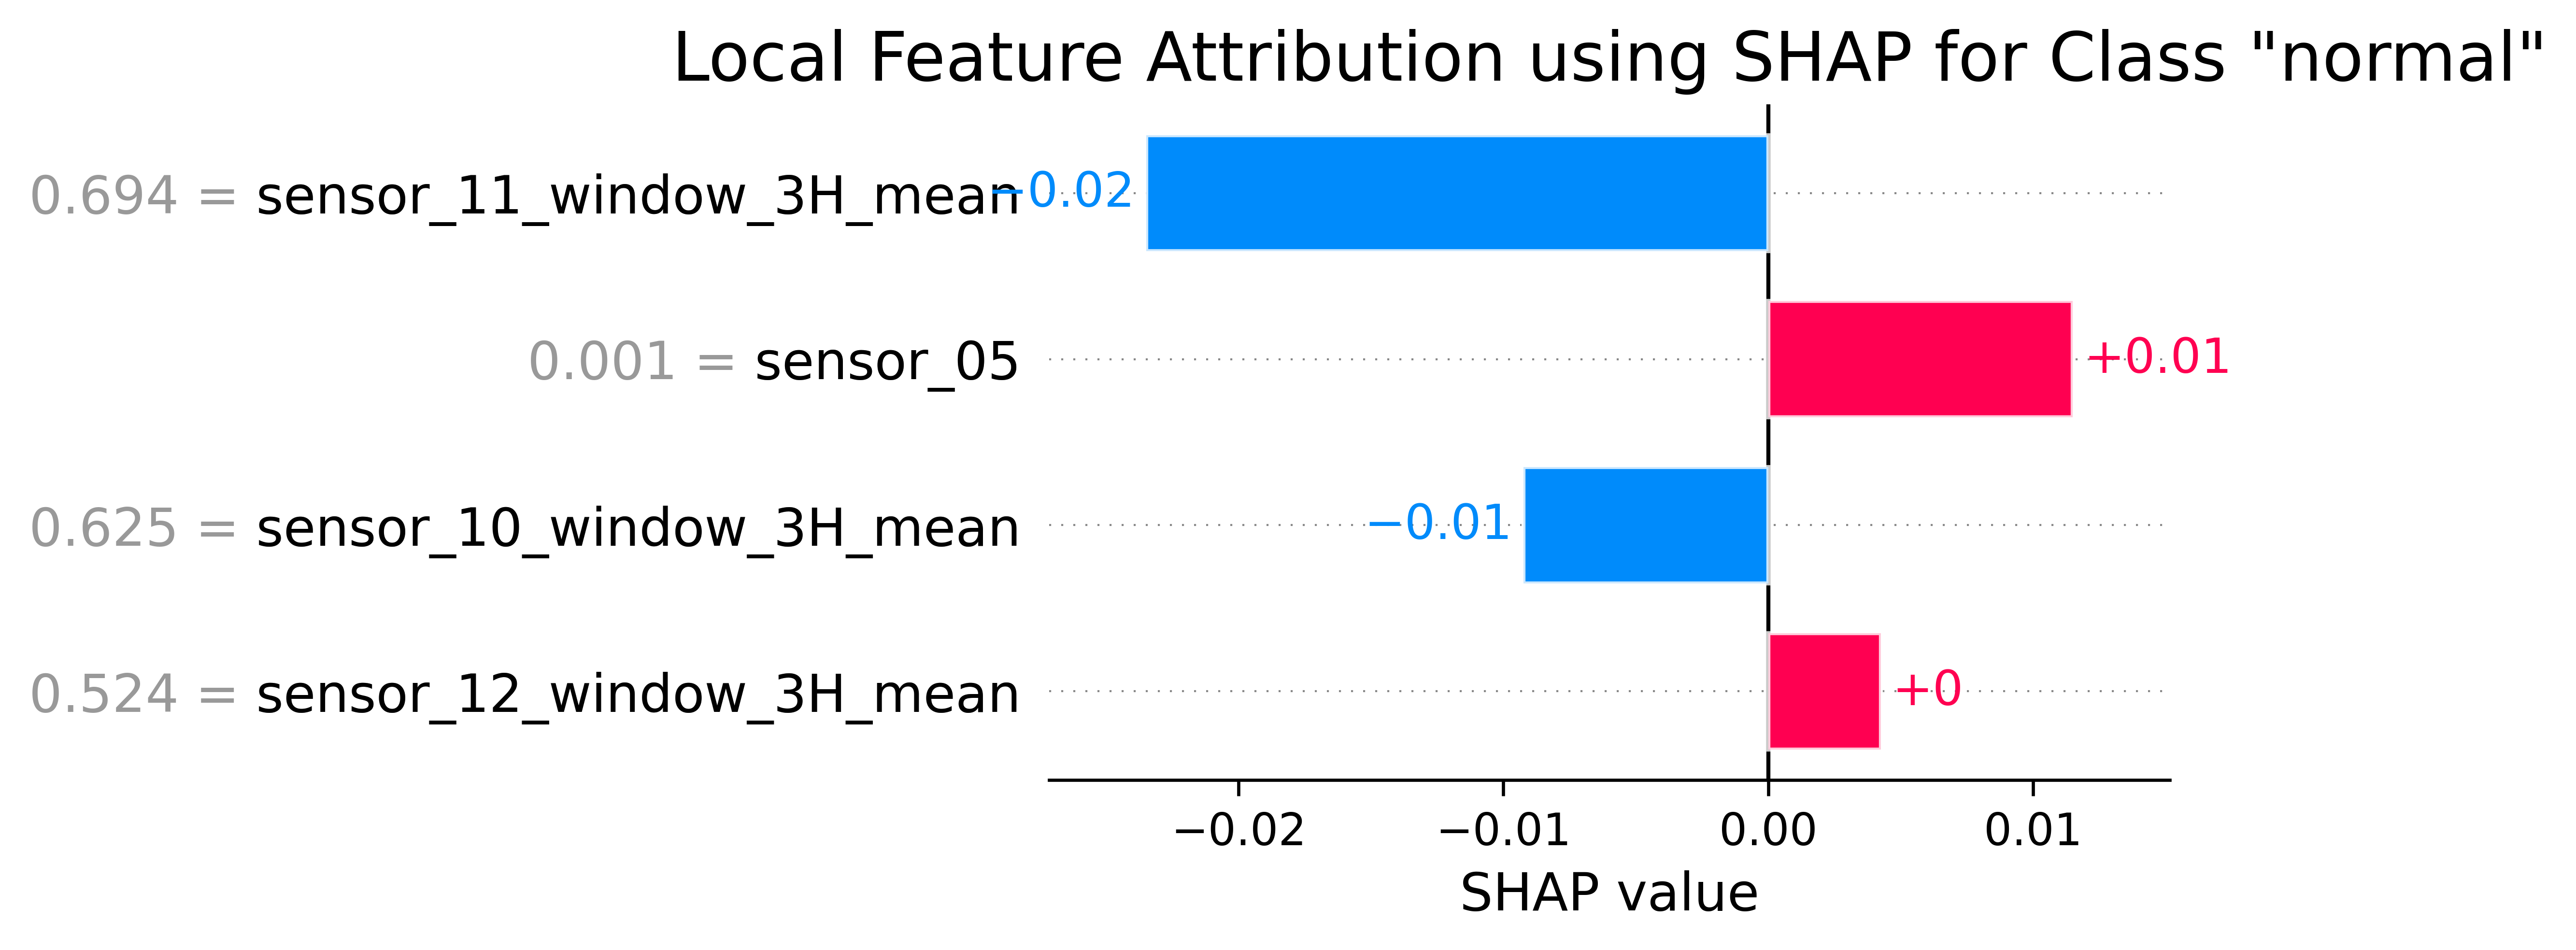

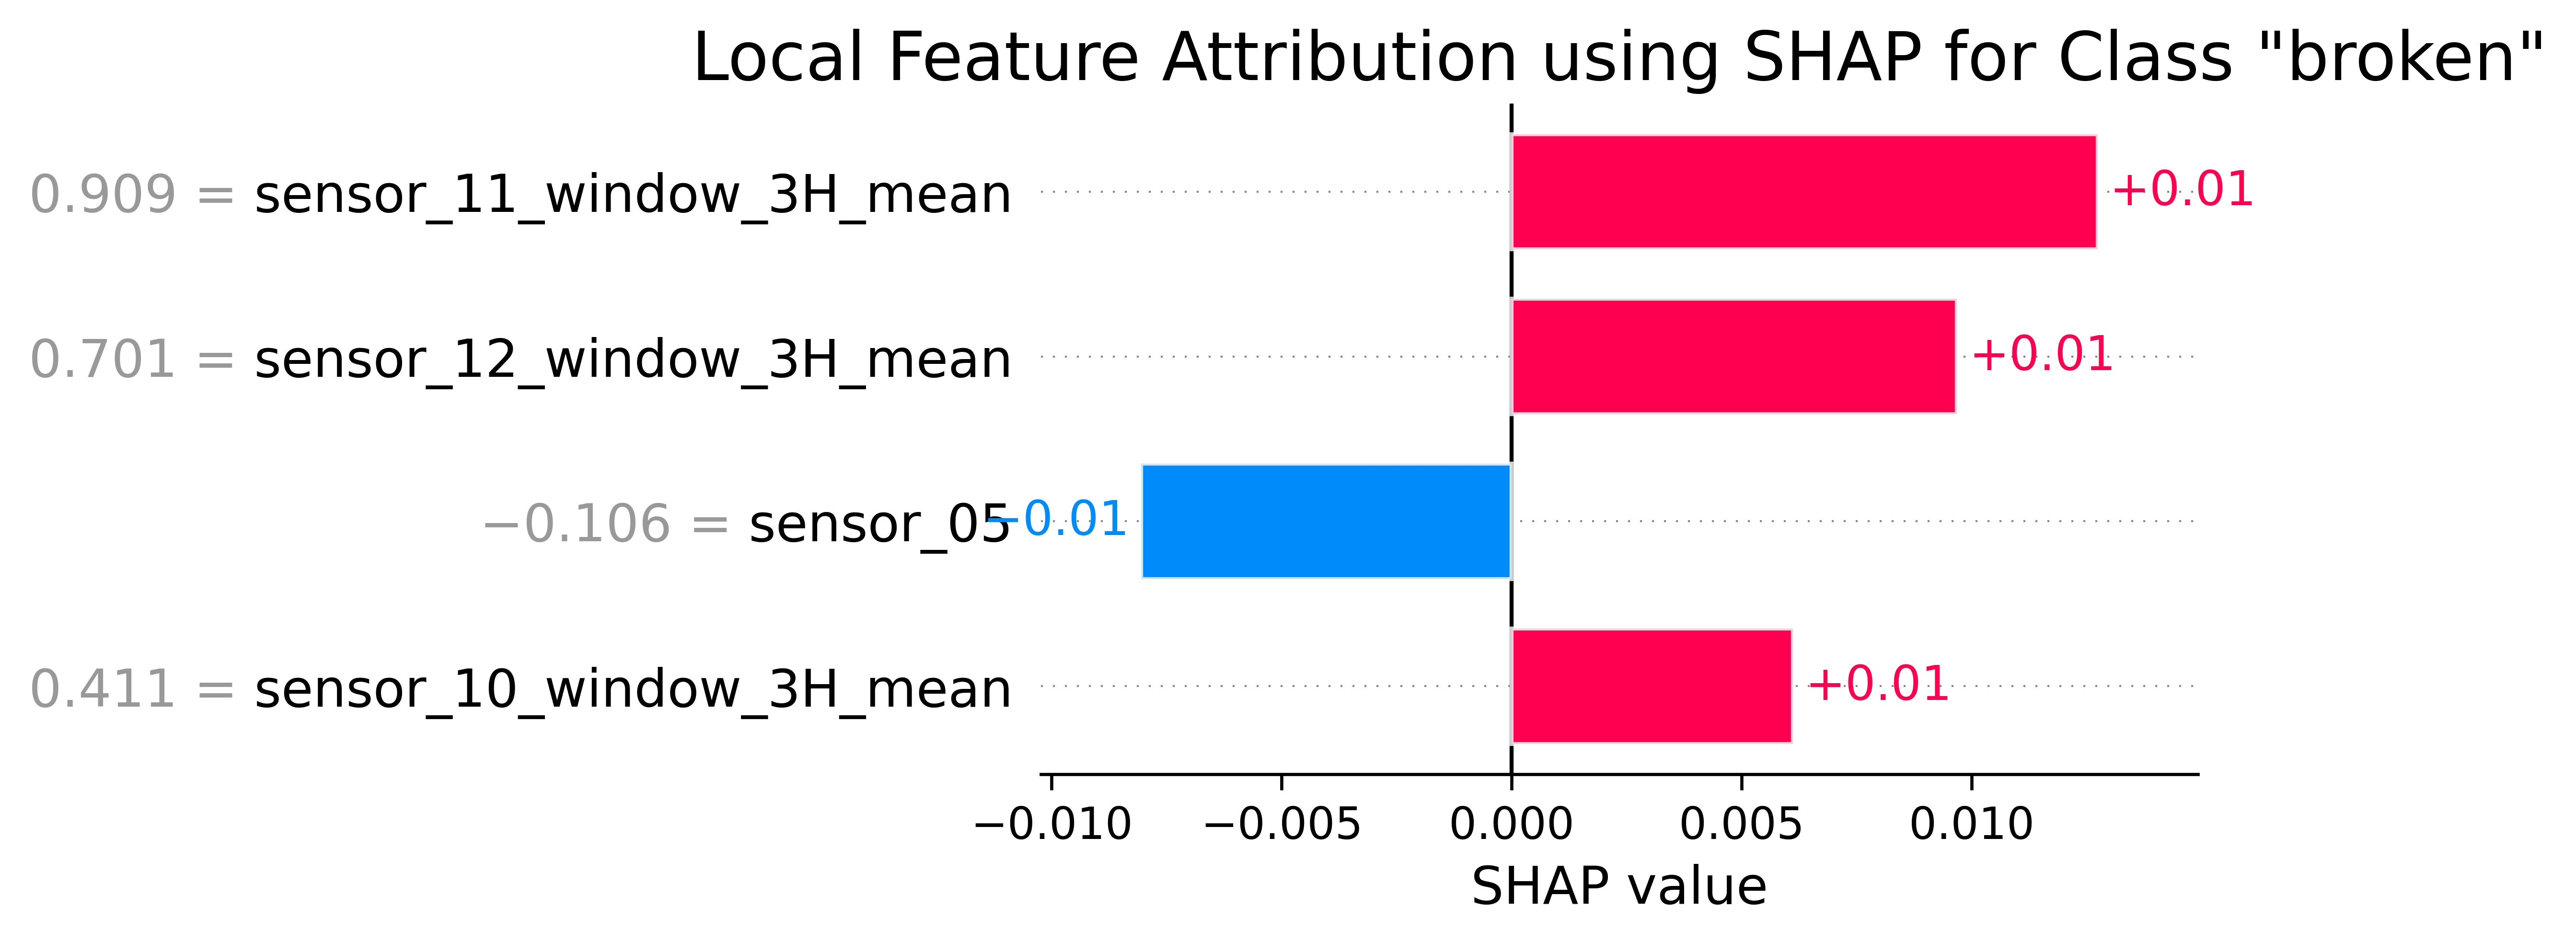

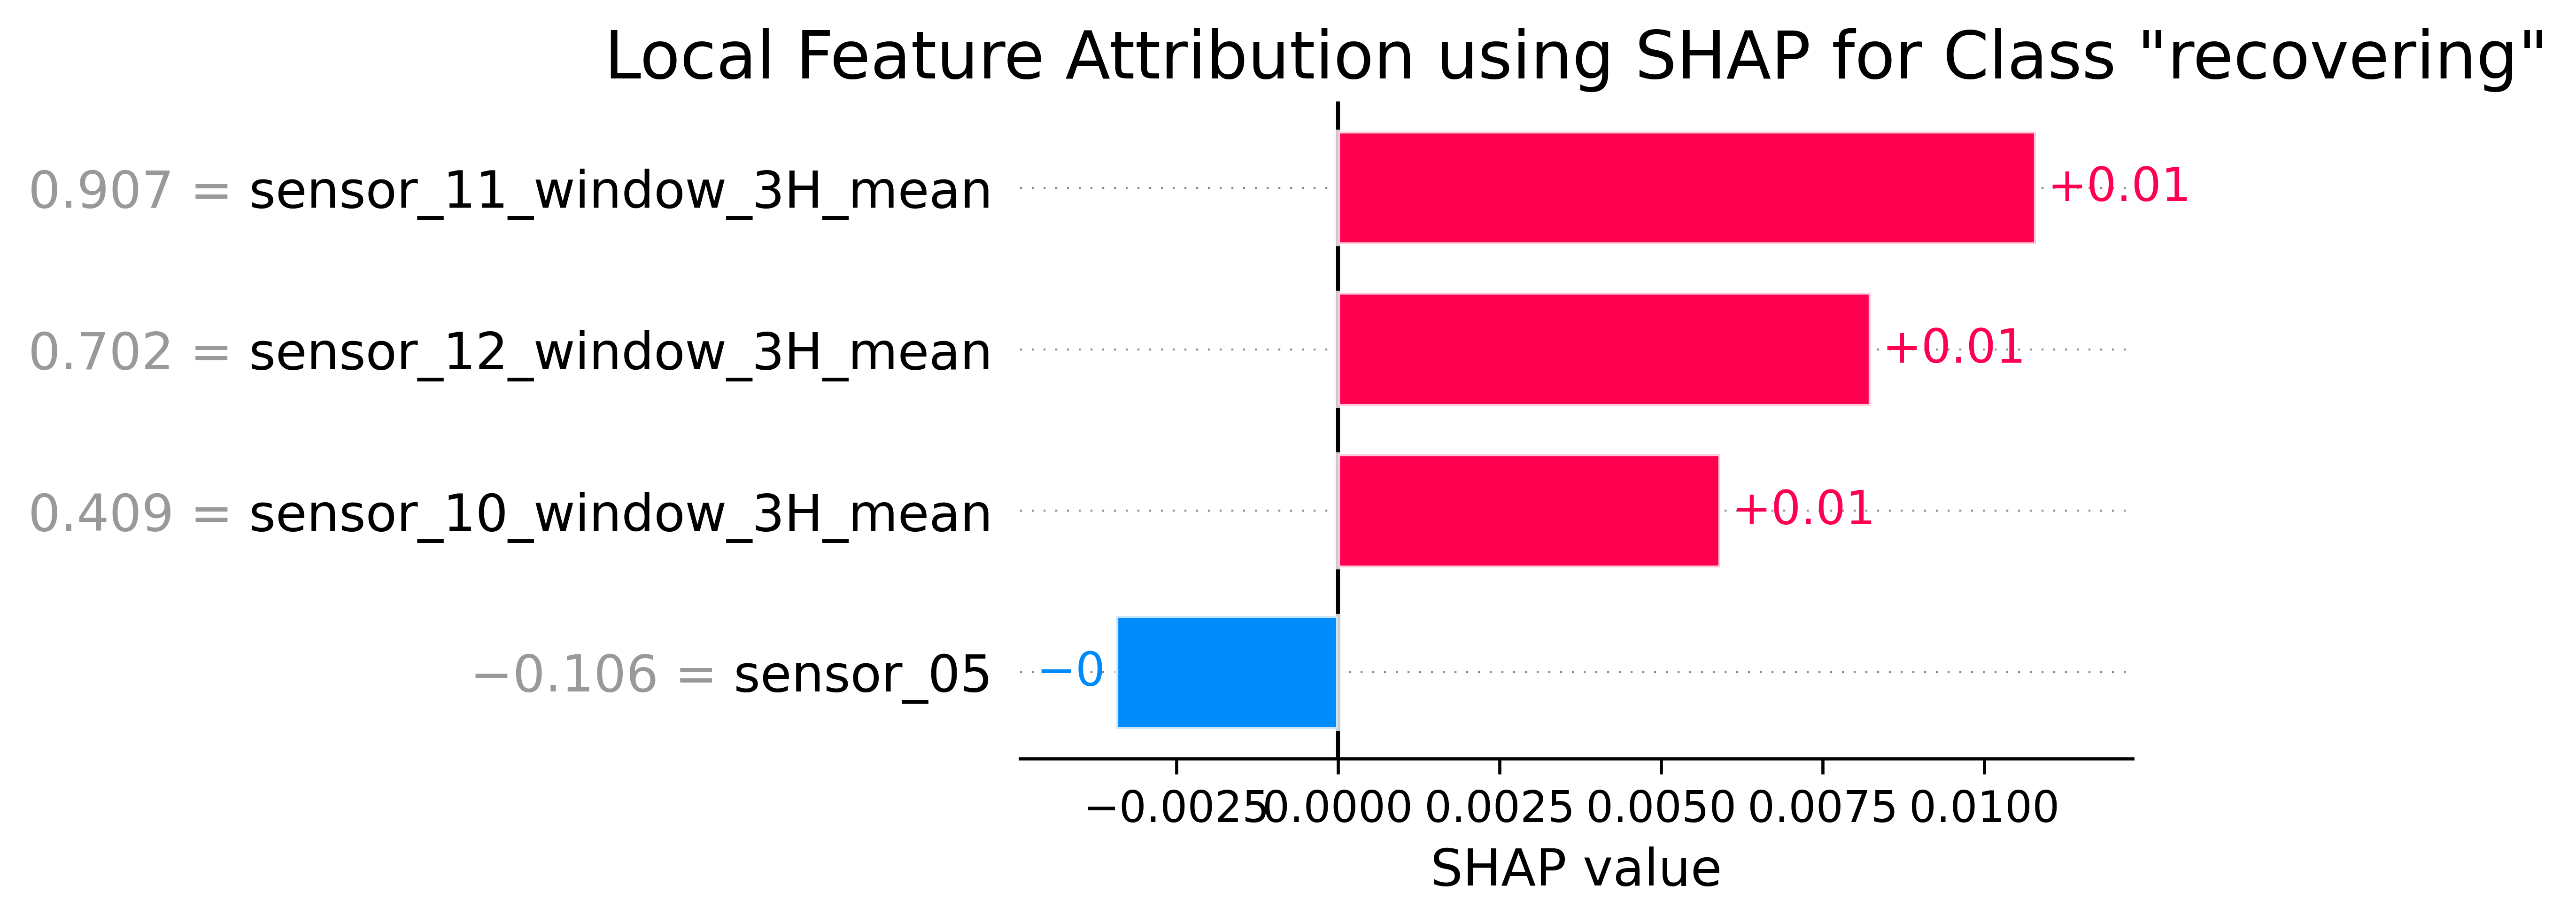

In [83]:
# Calculate Shap values for each class index and data index

# Recall numerical labels and class labels mappings:
# - 'broken'= class 0
# - 'normal'= class 1
# - 'recovering'= class 2

# Define the class indices and data indices
indices = [(1, 0), (0, 11784), (2, 11785)]

for class_index, data_index in indices:
    # Check if the column exists before dropping
    if target_variable in df_test.columns:
        data = df_test[data_index:data_index+1].drop(target_variable, axis=1)
    else:
        data = df_test[data_index:data_index+1]

    shap_values = explainer(data)

    # Get the class label from the mapping
    class_label = unique_class_labels[class_index]

    # Local explainability: Summary Plot
    # plt.title(f'Local Feature Attribution using SHAP for Class "{class_label}" (Class index {class_index}) and Data Index {data_index}')
    plt.title(f'Local Feature Attribution using SHAP for Class "{class_label}"')
    shap.plots.bar(shap_values[0,:,class_index], show=True, max_display=50, show_data=True)

In [84]:
# # Here we repeat the above explanation process for sample_size individuals. Since we are using a sampling based approximation each explanation can take a couple seconds depending on your machine setup.

# # Calculate Shap values for many predictions
# shap_values_multiple = explainer(df_test[0:sample_size].drop(target_variable, axis=1))

Exact explainer: 501it [00:36, 10.49it/s]                         


In [85]:
# # Save trained model to disk
# filename = '../../code/pump/models/ML_shap_explainer_model_2023.sav'
# joblib.dump(shap_values_multiple, open(filename, 'wb'), compress=3)

#### Load trained shap model

In [86]:
# load the model from disk
filename = '../../code/pump/models/ML_shap_explainer_model_2023.sav'
shap_values_multiple = joblib.load(open(filename, 'rb'))

In [87]:
(len(shap_values_multiple))

500

In [84]:
# class_index = 1
# data_index = 0

Explain many predictions (global)

In [85]:
# # Global explainability: Summary Plot
# plt.title('Global Feature Attribution using SHAP')
# shap.plots.bar(shap_values_multiple[:,:,class_index])

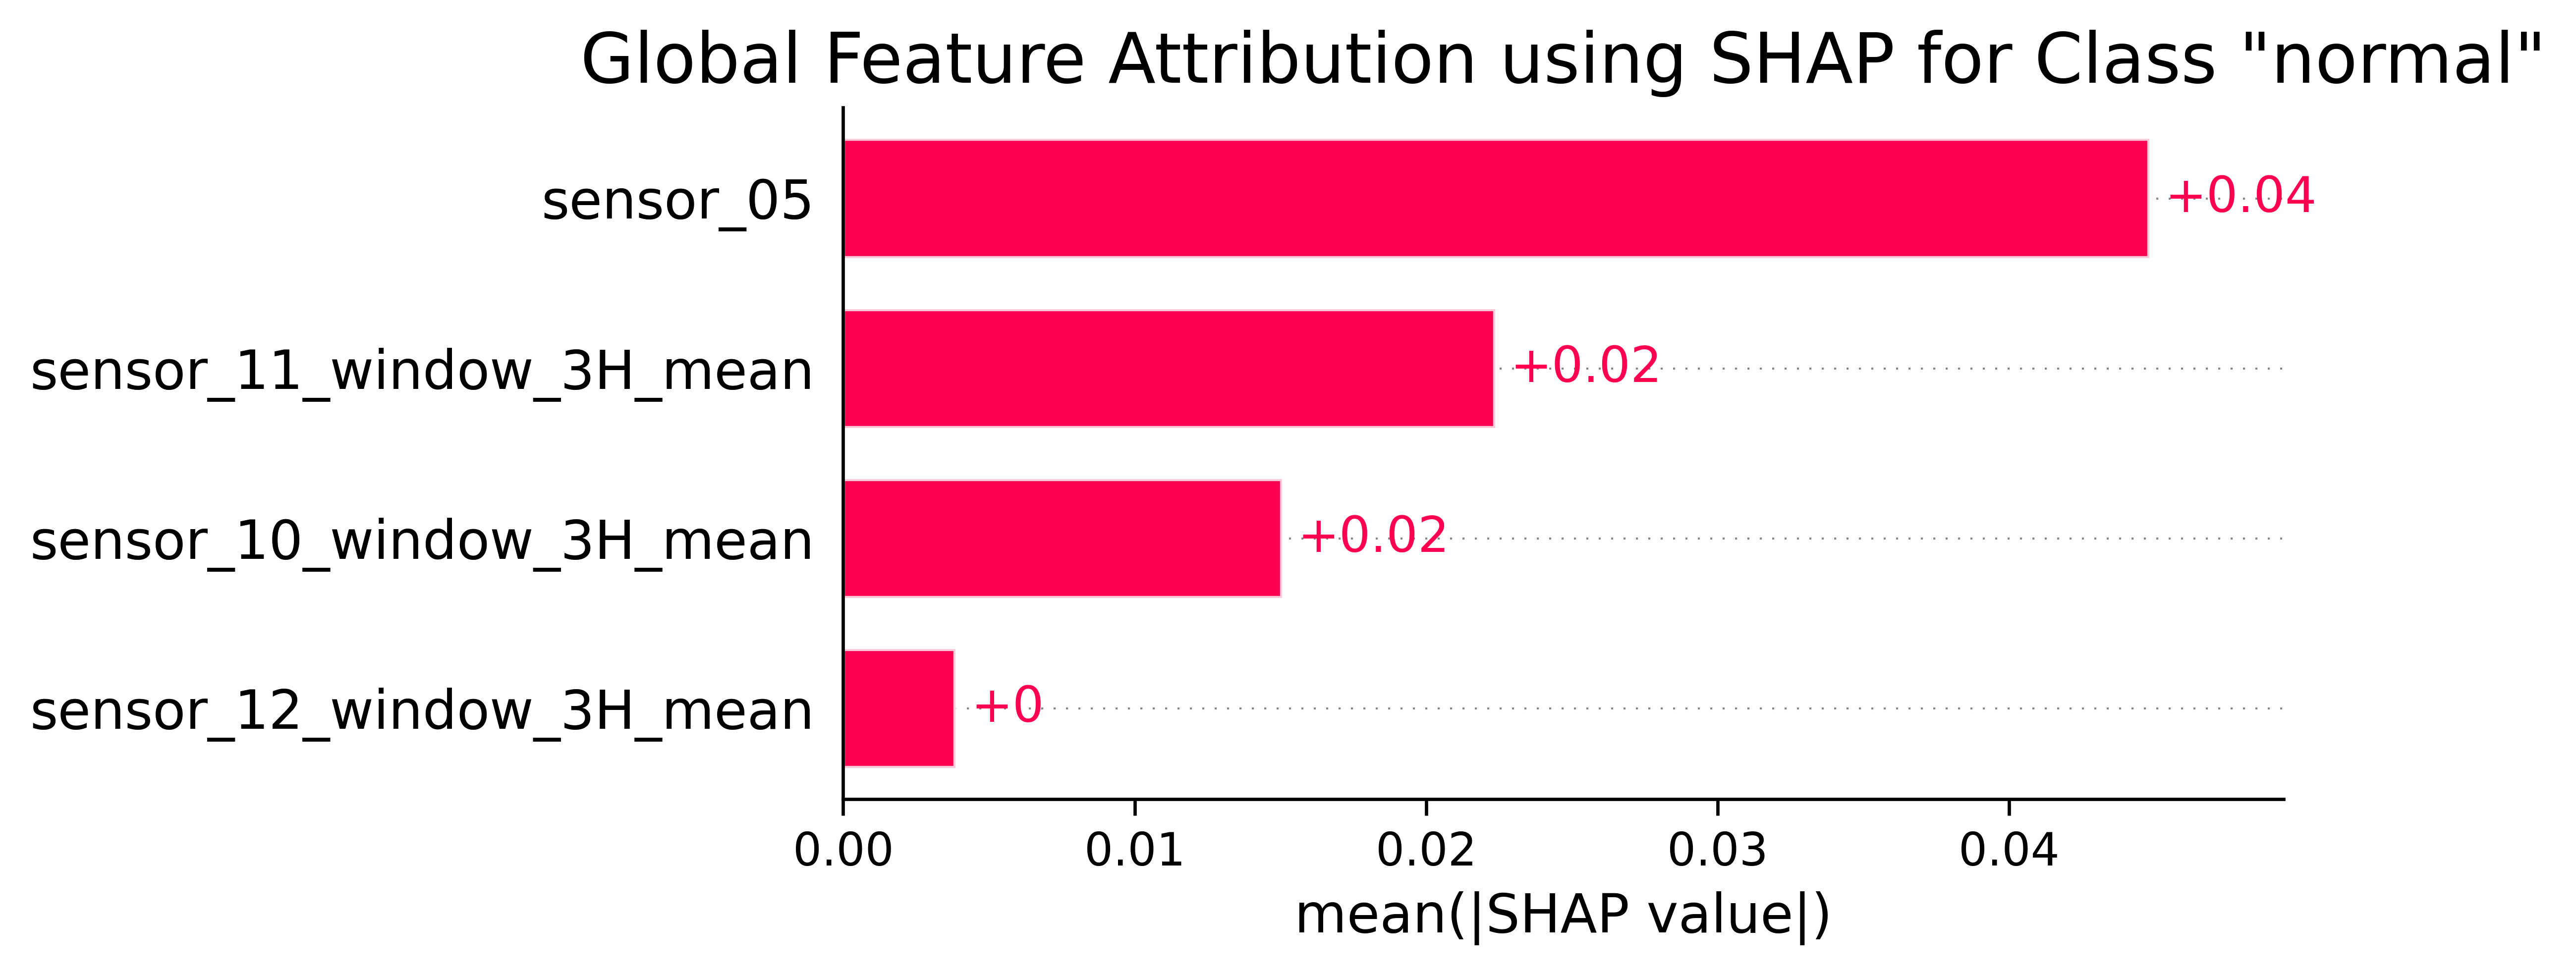

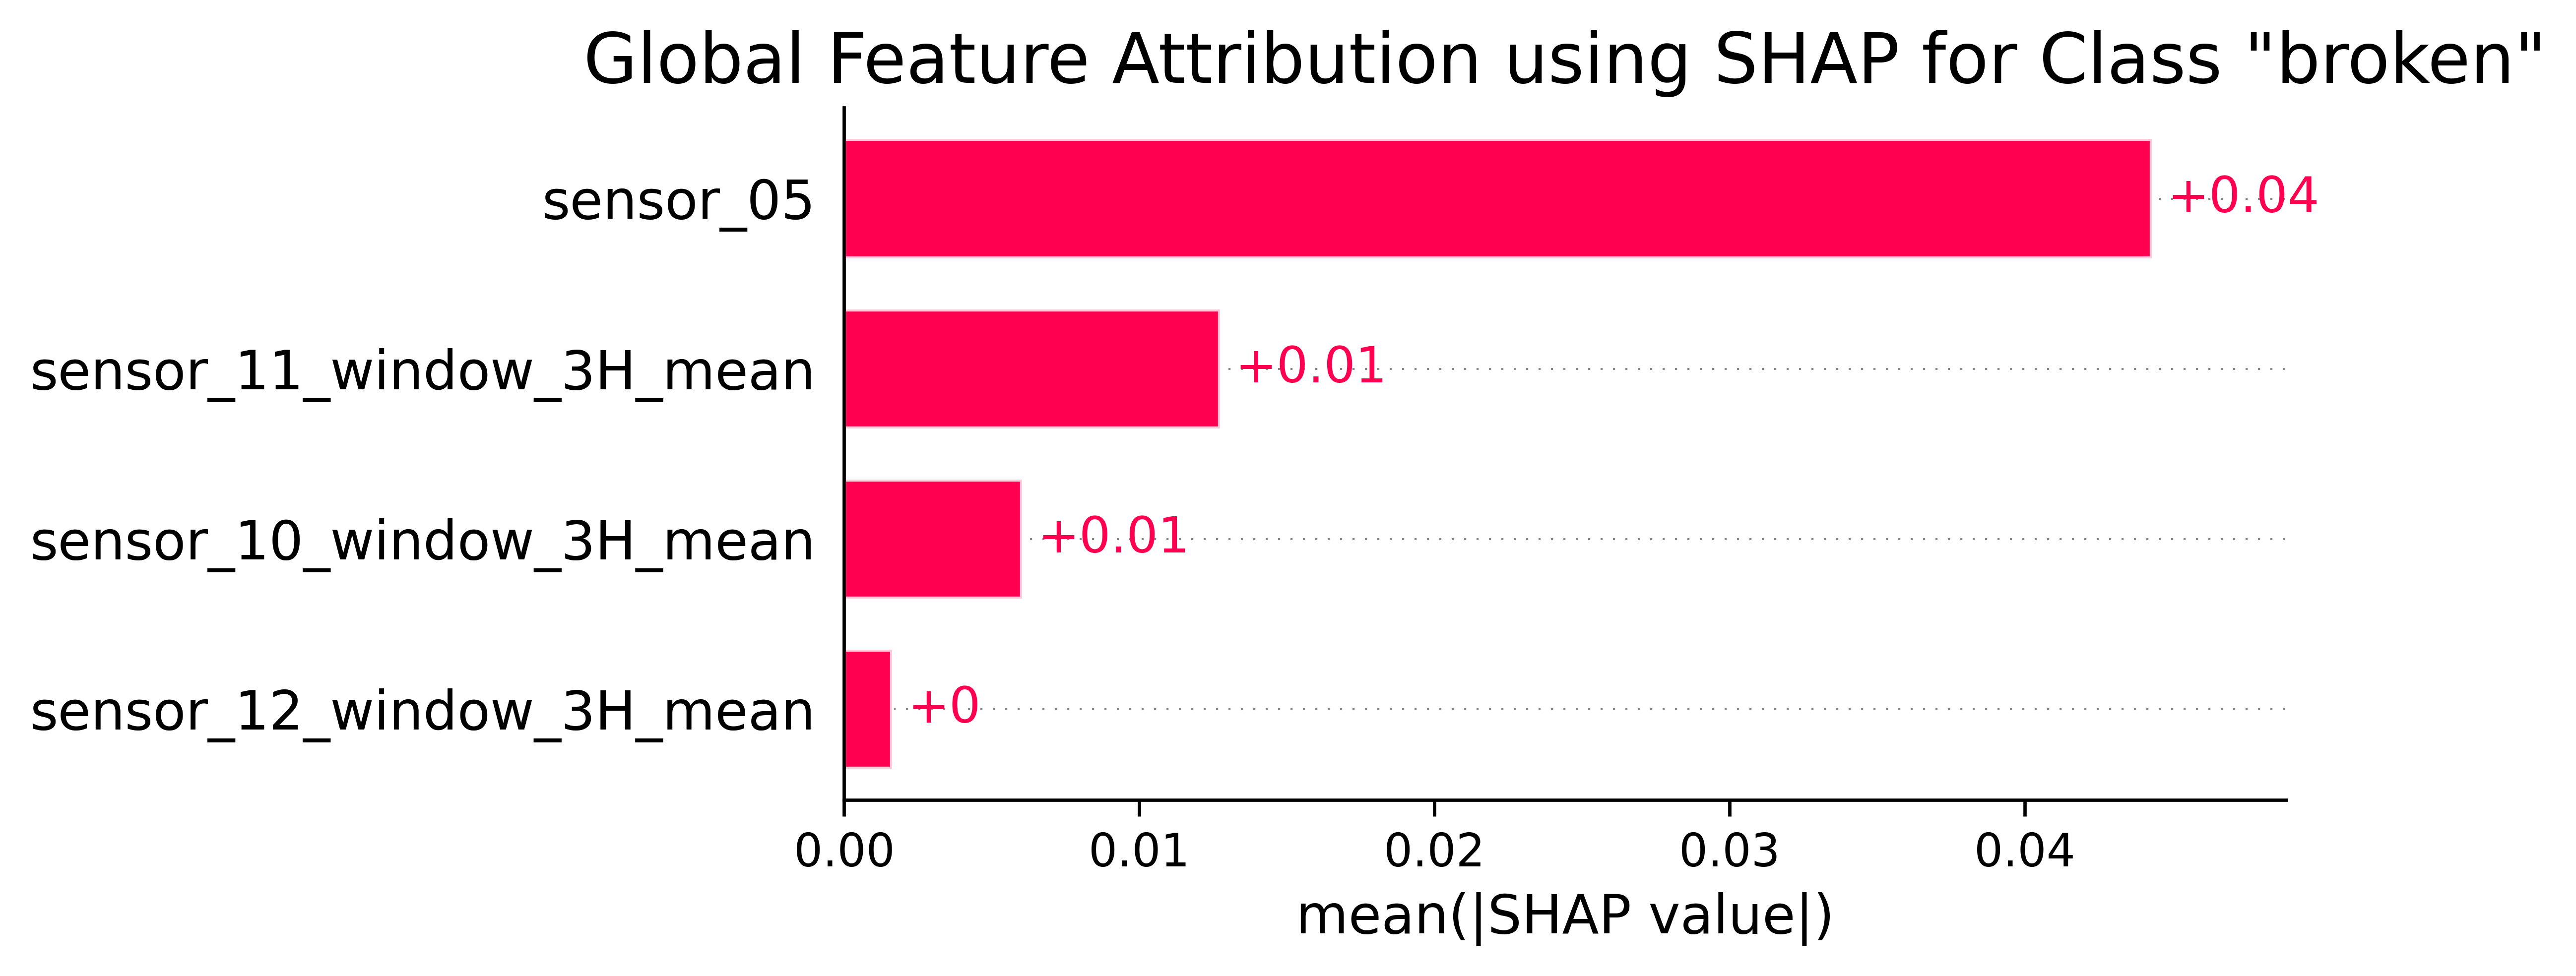

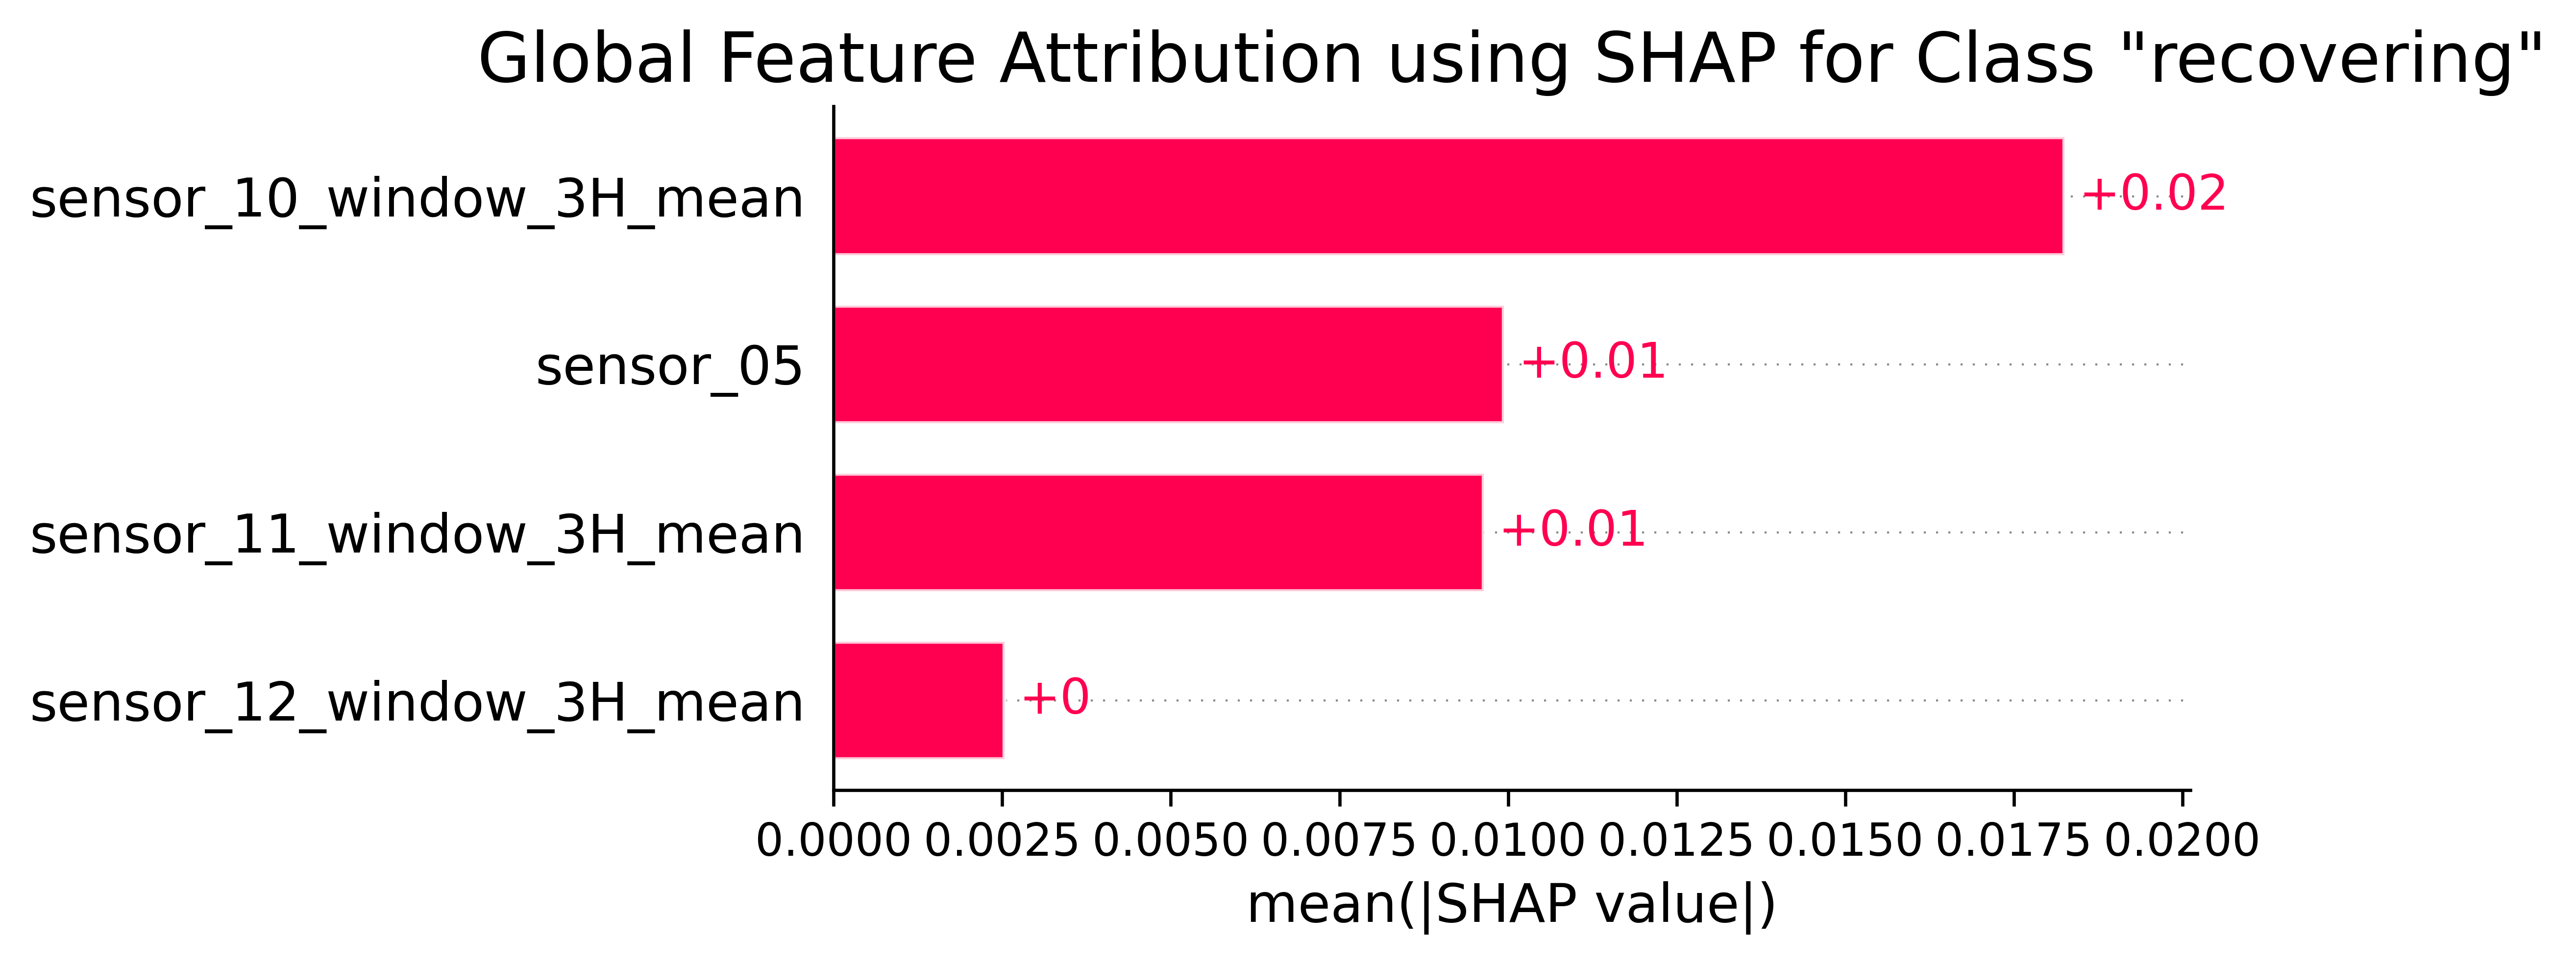

In [88]:
# Recall numerical labels and class labels mappings:
# - 'broken'= class 0
# - 'normal'= class 1
# - 'recovering'= class 2

# Define the class indices
class_indices = [1, 0, 2]

# Iterate over each class index
for class_index in class_indices:
    
    # Get the class label from the mapping
    class_label = unique_class_labels[class_index]
    
    # Global explainability: Summary Plot
    # plt.title(f'Global Feature Attribution using SHAP for Class "{class_label}" (Class index {class_index})')
    plt.title(f'Global Feature Attribution using SHAP for Class "{class_label}"')
    
    shap.plots.bar(shap_values_multiple[:,:,class_index], show=True, max_display=50)

### Counterfactual Explanations (CFEs)

Preparing the DiCE data object

In [89]:
# Preparing the DiCE data object
data_object = dice_ml.Data(dataframe = df_train,
                           continuous_features = numeric_columns,
                           outcome_name = target_variable
                           )

# backend = 'TF'+tf.__version__[0]
backend = 'sklearn'

model_object = dice_ml.Model(model = adaboot, backend=backend, model_type='classifier') # Creating Scikit-Learn model object

Creating DiCE explanation object

In [90]:
# Creating DiCE explanation object
explainer = dice_ml.Dice(data_object, model_object, method = 'random')

### Counterfactuals are focusing on normal to generate "abnormal" pump status. Meaning we are trying to find out what conditions lead to a specific "abnormal" pump status

#### Query instance of class 1 "normal", and the counterfactual generated for class 1 "normal", for desired class 2 "recovering"

In [75]:
test_query = df_test[0:1].drop(target_variable, axis=1)

cfe = explainer.generate_counterfactuals(test_query, 
                                        total_CFs=5, 
                                        desired_range=None,
                                        # desired_class=0,
                                        desired_class=2,
                                        # features_to_vary = numeric_columns,
                                        features_to_vary= "all",
                                        random_seed = rng,
                                        proximity_weight=1.5,
                                        diversity_weight=1.0,
                                        stopping_threshold=0.5,
                                        verbose=True)

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

Diverse Counterfactuals found! total time taken: 00 min 01 sec


In [83]:
# Estimate Local Feature Importance
local_importance = explainer.local_feature_importance(test_query, desired_class=2)
print(local_importance.local_importance)

100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

[{'sensor_05': 1.0, 'sensor_10_window_3H_mean': 0.6, 'sensor_12_window_3H_mean': 0.1, 'sensor_11_window_3H_mean': 0.0}]


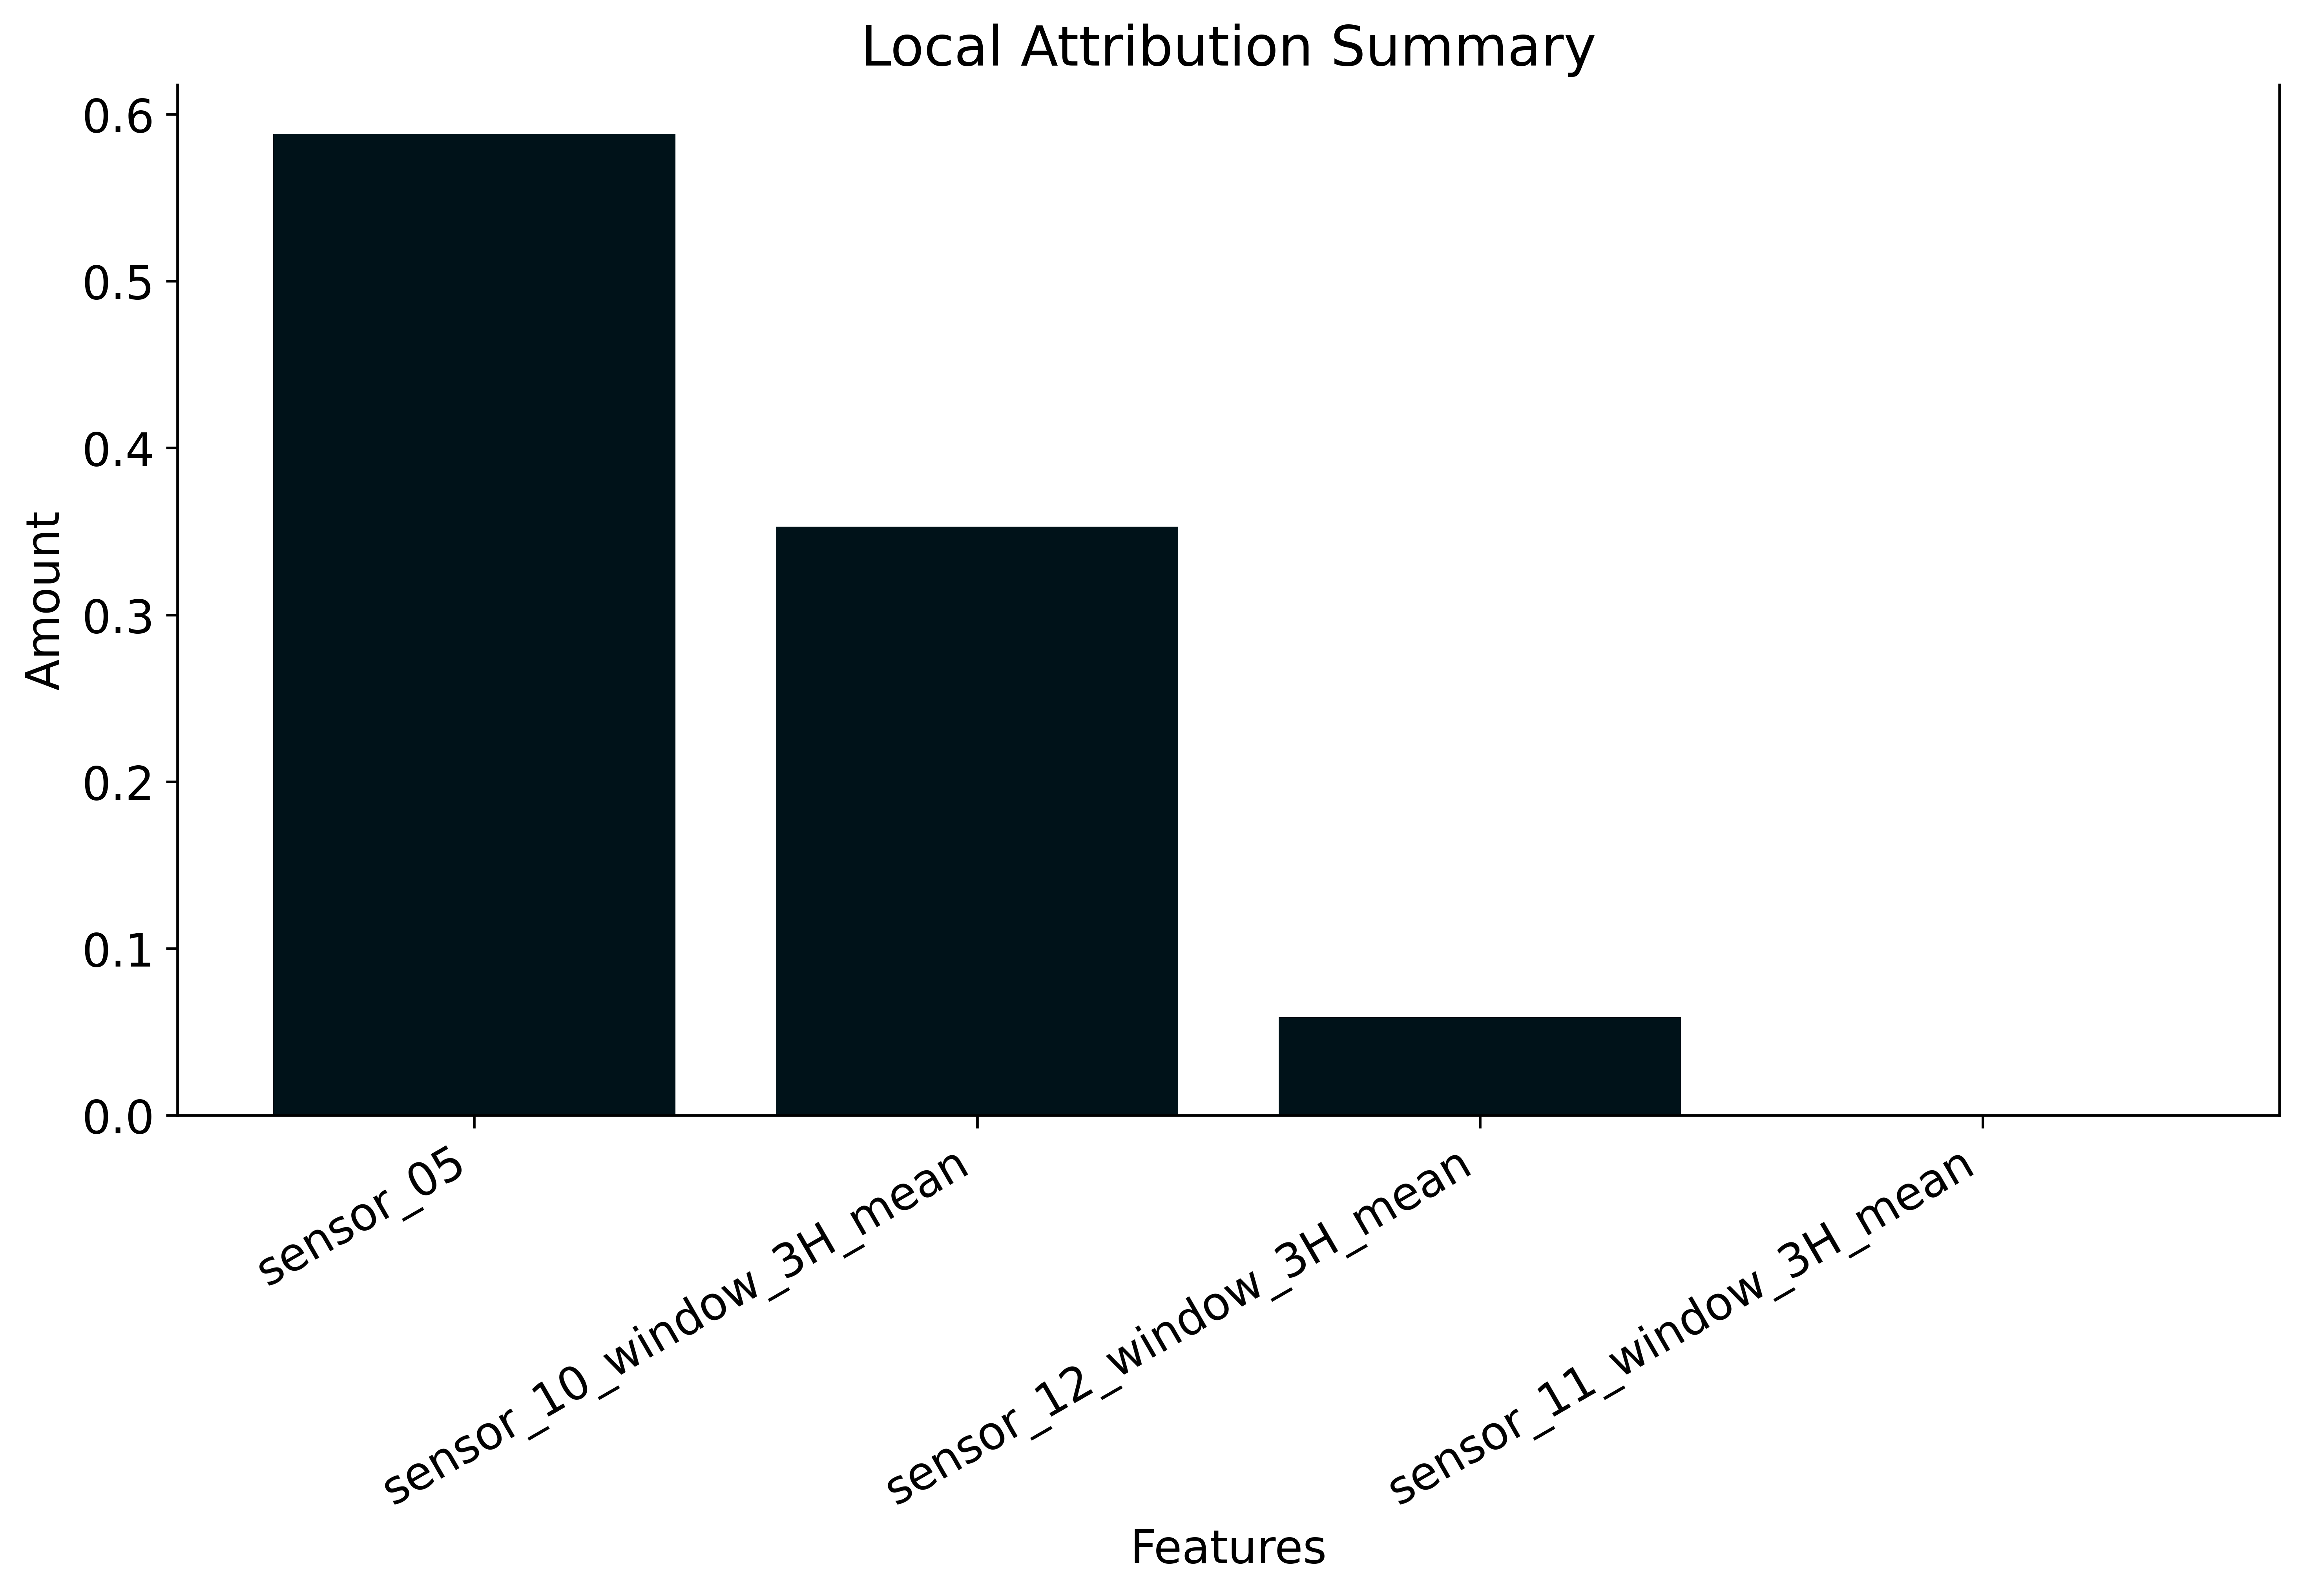

In [84]:
# # Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(range(len(local_importance.local_importance[0])), 
        list(local_importance.local_importance[0].values())/(np.sum(list(local_importance.local_importance[0].values()))), 
        tick_label=list(local_importance.local_importance[0].keys()))
plt.ylabel('Amount')
plt.xlabel('Features')
ax.set_title("Local Attribution Summary")
# make x-axis ticks legible
fig = plt.gcf()
fig.autofmt_xdate()  # auto format data
plt.show()

#### Query instance of class 1 "normal", and the counterfactual generated for class 0 "broken", for desired class 0 and 2 that is "broken" and "recovering"
NB! No counterfactuals are generated for class 2 "recovering". This is due to not enough variablity

In [92]:
# Desired classes for which you want to generate counterfactuals
# desired_classes = [0, 2]
desired_classes = [2]

test_query = df_test[0:1].drop(target_variable, axis=1)

for desired_class in desired_classes:
    # class_label = class_label_mapping[desired_class]  # Get the corresponding string label
    class_label = unique_class_labels[desired_class] # Get the corresponding string label

    # Generate counterfactuals
    cfe = explainer.generate_counterfactuals(test_query, 
                                            total_CFs=5, 
                                            desired_range=None,
                                            desired_class=desired_class,
                                            features_to_vary="all",
                                            random_seed=rng,
                                            proximity_weight=1.5,
                                            diversity_weight=1.0,
                                            stopping_threshold=0.5,
                                            verbose=True)

    cfe.visualize_as_dataframe(show_only_changes=True)

    # Extract the counterfactual instance
    counterfactual_instance = cfe.cf_examples_list[0].final_cfs_df

    # Get the original input query
    original_query = test_query.values.flatten()

    # Iterate through the counterfactuals and compare with the original query
    for i, cf in enumerate(counterfactual_instance.values):
        print(f'Counterfactual {i + 1} for Class "{class_label}" ( and Desired Class index {desired_class}):')
        for feature_idx, (original_value, cf_value) in enumerate(zip(original_query, cf)):
            if original_value != cf_value:
                feature_name = test_query.columns[feature_idx]
                print(f"The feature {feature_name} has to change from {original_value} to {cf_value}")
        print("\n")
    
    # Iterate through the counterfactuals and compare with the original query
    for i, cf in enumerate(counterfactual_instance.values):
        print(f'Counterfactual {i + 1} for Class "{class_label}" ( and Desired Class {desired_class}):')
        for feature_idx, (original_value, cf_value) in enumerate(zip(original_query, cf)):
            feature_name = test_query.columns[feature_idx]

            # Handle categorical variables
            if isinstance(original_value, str) or isinstance(cf_value, str):
                if original_value != cf_value:
                    print(f"The feature {feature_name} has to change from '{original_value}' to '{cf_value}'")
            else:
                # Calculate the change for numerical variables
                change = cf_value - original_value
                if change != 0:
                    percentage_change = (change / abs(original_value))  * 100
                    print(f"The feature {feature_name} has to change by {change} ({percentage_change:.2f}%) to {cf_value}")
        print("\n")

    # # Estimate Local Feature Importance
    # local_importance = explainer.local_feature_importance(test_query, desired_class=desired_class)
    # print(f'Local Feature Importance for class "{class_label}" (Desired Class {desired_class}):')
    # print(local_importance.local_importance)

    # fig, ax = plt.subplots(figsize=(10, 7))
    # plt.bar(range(len(local_importance.local_importance[0])), 
    #         list(local_importance.local_importance[0].values())/(np.sum(list(local_importance.local_importance[0].values()))), 
    #         tick_label=list(local_importance.local_importance[0].keys()))
    # plt.ylabel('Amount')
    # plt.xlabel('Features')
    # ax.set_title(f'Local Attribution Summary for class "{class_label}" (Desired Class {desired_class})')
    # fig.autofmt_xdate()  # Auto format data
    # plt.show()

100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

Diverse Counterfactuals found! total time taken: 00 min 01 sec
Query instance (original outcome : 1)


sensor_11_window_3H_mean  sensor_12_window_3H_mean  sensor_05  sensor_10_window_3H_mean  pump_status
0                  0.693815                  0.524189   0.000709                  0.624709            1


Diverse Counterfactual set (new outcome: 2)


sensor_11_window_3H_mean sensor_12_window_3H_mean   sensor_05 sensor_10_window_3H_mean pump_status
0                        -                        -   -3.665019                        -         2.0
1                        -               -2.5082043   -3.657784                        -         2.0
2                        -                        -  -3.5593897               -2.8465657         2.0
3                        -                        -  -3.6582662               -2.9265728         2.0
4                        -               -2.4914598  -3.6344541                        -         2.0

Counterfactual 1 for Class "recovering" ( and Desired Class index 2):
The feature sensor_05 has to change from 0.0007093246676959097 to -3.665019


Counterfactual 2 for Class "recovering" ( and Desired Class index 2):
The feature sensor_12_window_3H_mean has to change from 0.524188756942749 to -2.5082043
The feature sensor_05 has to change from 0.0007093246676959097 to -3.657784


Counterfactual 3 for Class "recovering" ( and Desired Class index 2):
The feature sensor_05 has to change from 0.0007093246676959097 to -3.5593897
The feature sensor_10_window_3H_mean has to change from 0.6247089505195618 to -2.8465657


Counterfactual 4 for Class "recovering" ( and Desired Class index 2):
The feature sensor_05 has to change from 0.0007093246676959097 to -3.6582662
The feature sensor_10_window_3H_mean has to change from 0.6247089505195618 to -2.9265728


Counterfactual 5 for Class "recovering" ( and Desired Class index 2):
The feature sensor_12_window_3H_mean has to change from 0.524188756942

In [85]:
# # Looking for Global Importance (sort of, selecting a range of samples instead of just one)
# global_importance = explainer.global_feature_importance(df_train[0:500].drop(target_variable, axis=1), total_CFs=10, posthoc_sparsity_param=None, desired_class=2)
# print(global_importance.summary_importance)

  1%|          | 6/500 [00:01<02:48,  2.93it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 27/500 [00:10<03:03,  2.58it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 28/500 [00:10<03:06,  2.53it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 33/500 [00:12<03:13,  2.42it/s]

Only 7 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 109/500 [00:36<02:27,  2.65it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 117/500 [00:39<02:31,  2.54it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 160/500 [00:56<02:08,  2.65it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 165/500 [00:57<02:08,  2.61it/s]

Only 6 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 170/500 [00:59<02:02,  2.69it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 173/500 [01:00<02:09,  2.52it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 179/500 [01:03<02:01,  2.65it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 186/500 [01:06<02:12,  2.37it/s]

Only 5 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 200/500 [01:11<02:03,  2.43it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 201/500 [01:12<02:09,  2.32it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 239/500 [01:27<01:41,  2.58it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 240/500 [01:28<01:41,  2.55it/s]

Only 6 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 248/500 [01:31<01:34,  2.67it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 252/500 [01:32<01:36,  2.58it/s]

Only 7 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 258/500 [01:35<01:39,  2.44it/s]

Only 5 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 262/500 [01:37<01:57,  2.02it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 263/500 [01:37<01:57,  2.01it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 281/500 [01:45<01:25,  2.55it/s]

Only 7 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 288/500 [01:48<01:22,  2.57it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 297/500 [01:51<01:18,  2.59it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 298/500 [01:52<01:18,  2.56it/s]

Only 5 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 312/500 [01:57<01:10,  2.68it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 327/500 [02:02<01:03,  2.72it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 328/500 [02:03<01:04,  2.66it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 334/500 [02:05<01:04,  2.56it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 341/500 [02:08<01:02,  2.56it/s]

Only 7 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 342/500 [02:09<01:02,  2.54it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 346/500 [02:10<01:00,  2.56it/s]

Only 7 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 362/500 [02:16<00:53,  2.59it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 364/500 [02:17<00:54,  2.51it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 365/500 [02:18<00:53,  2.51it/s]

Only 8 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 401/500 [02:27<00:29,  3.36it/s]

Only 7 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 406/500 [02:29<00:34,  2.71it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 500/500 [02:55<00:00,  2.85it/s]

Only 9 (required 10)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
{'sensor_05': 1.0, 'sensor_10_window_3H_mean': 0.9894351889475823, 'sensor_12_window_3H_mean': 0.6733035351483136, 'sensor_11_window_3H_mean': 0.06216984965461195}


In [86]:
# # # Save trained model to disk
# filename = '../../code/pump/models/ML_cfe_explainer_model_2023.sav'
# joblib.dump(global_importance, open(filename, 'wb'), compress=3)

#### Load trained CFE model

In [87]:
# load the model from disk
filename = '../../code/pump/models/ML_cfe_explainer_model_2023.sav'
global_importance = joblib.load(open(filename, 'rb'))

In [88]:
print(global_importance.summary_importance)

{'sensor_05': 1.0, 'sensor_10_window_3H_mean': 0.9894351889475823, 'sensor_12_window_3H_mean': 0.6733035351483136, 'sensor_11_window_3H_mean': 0.06216984965461195}


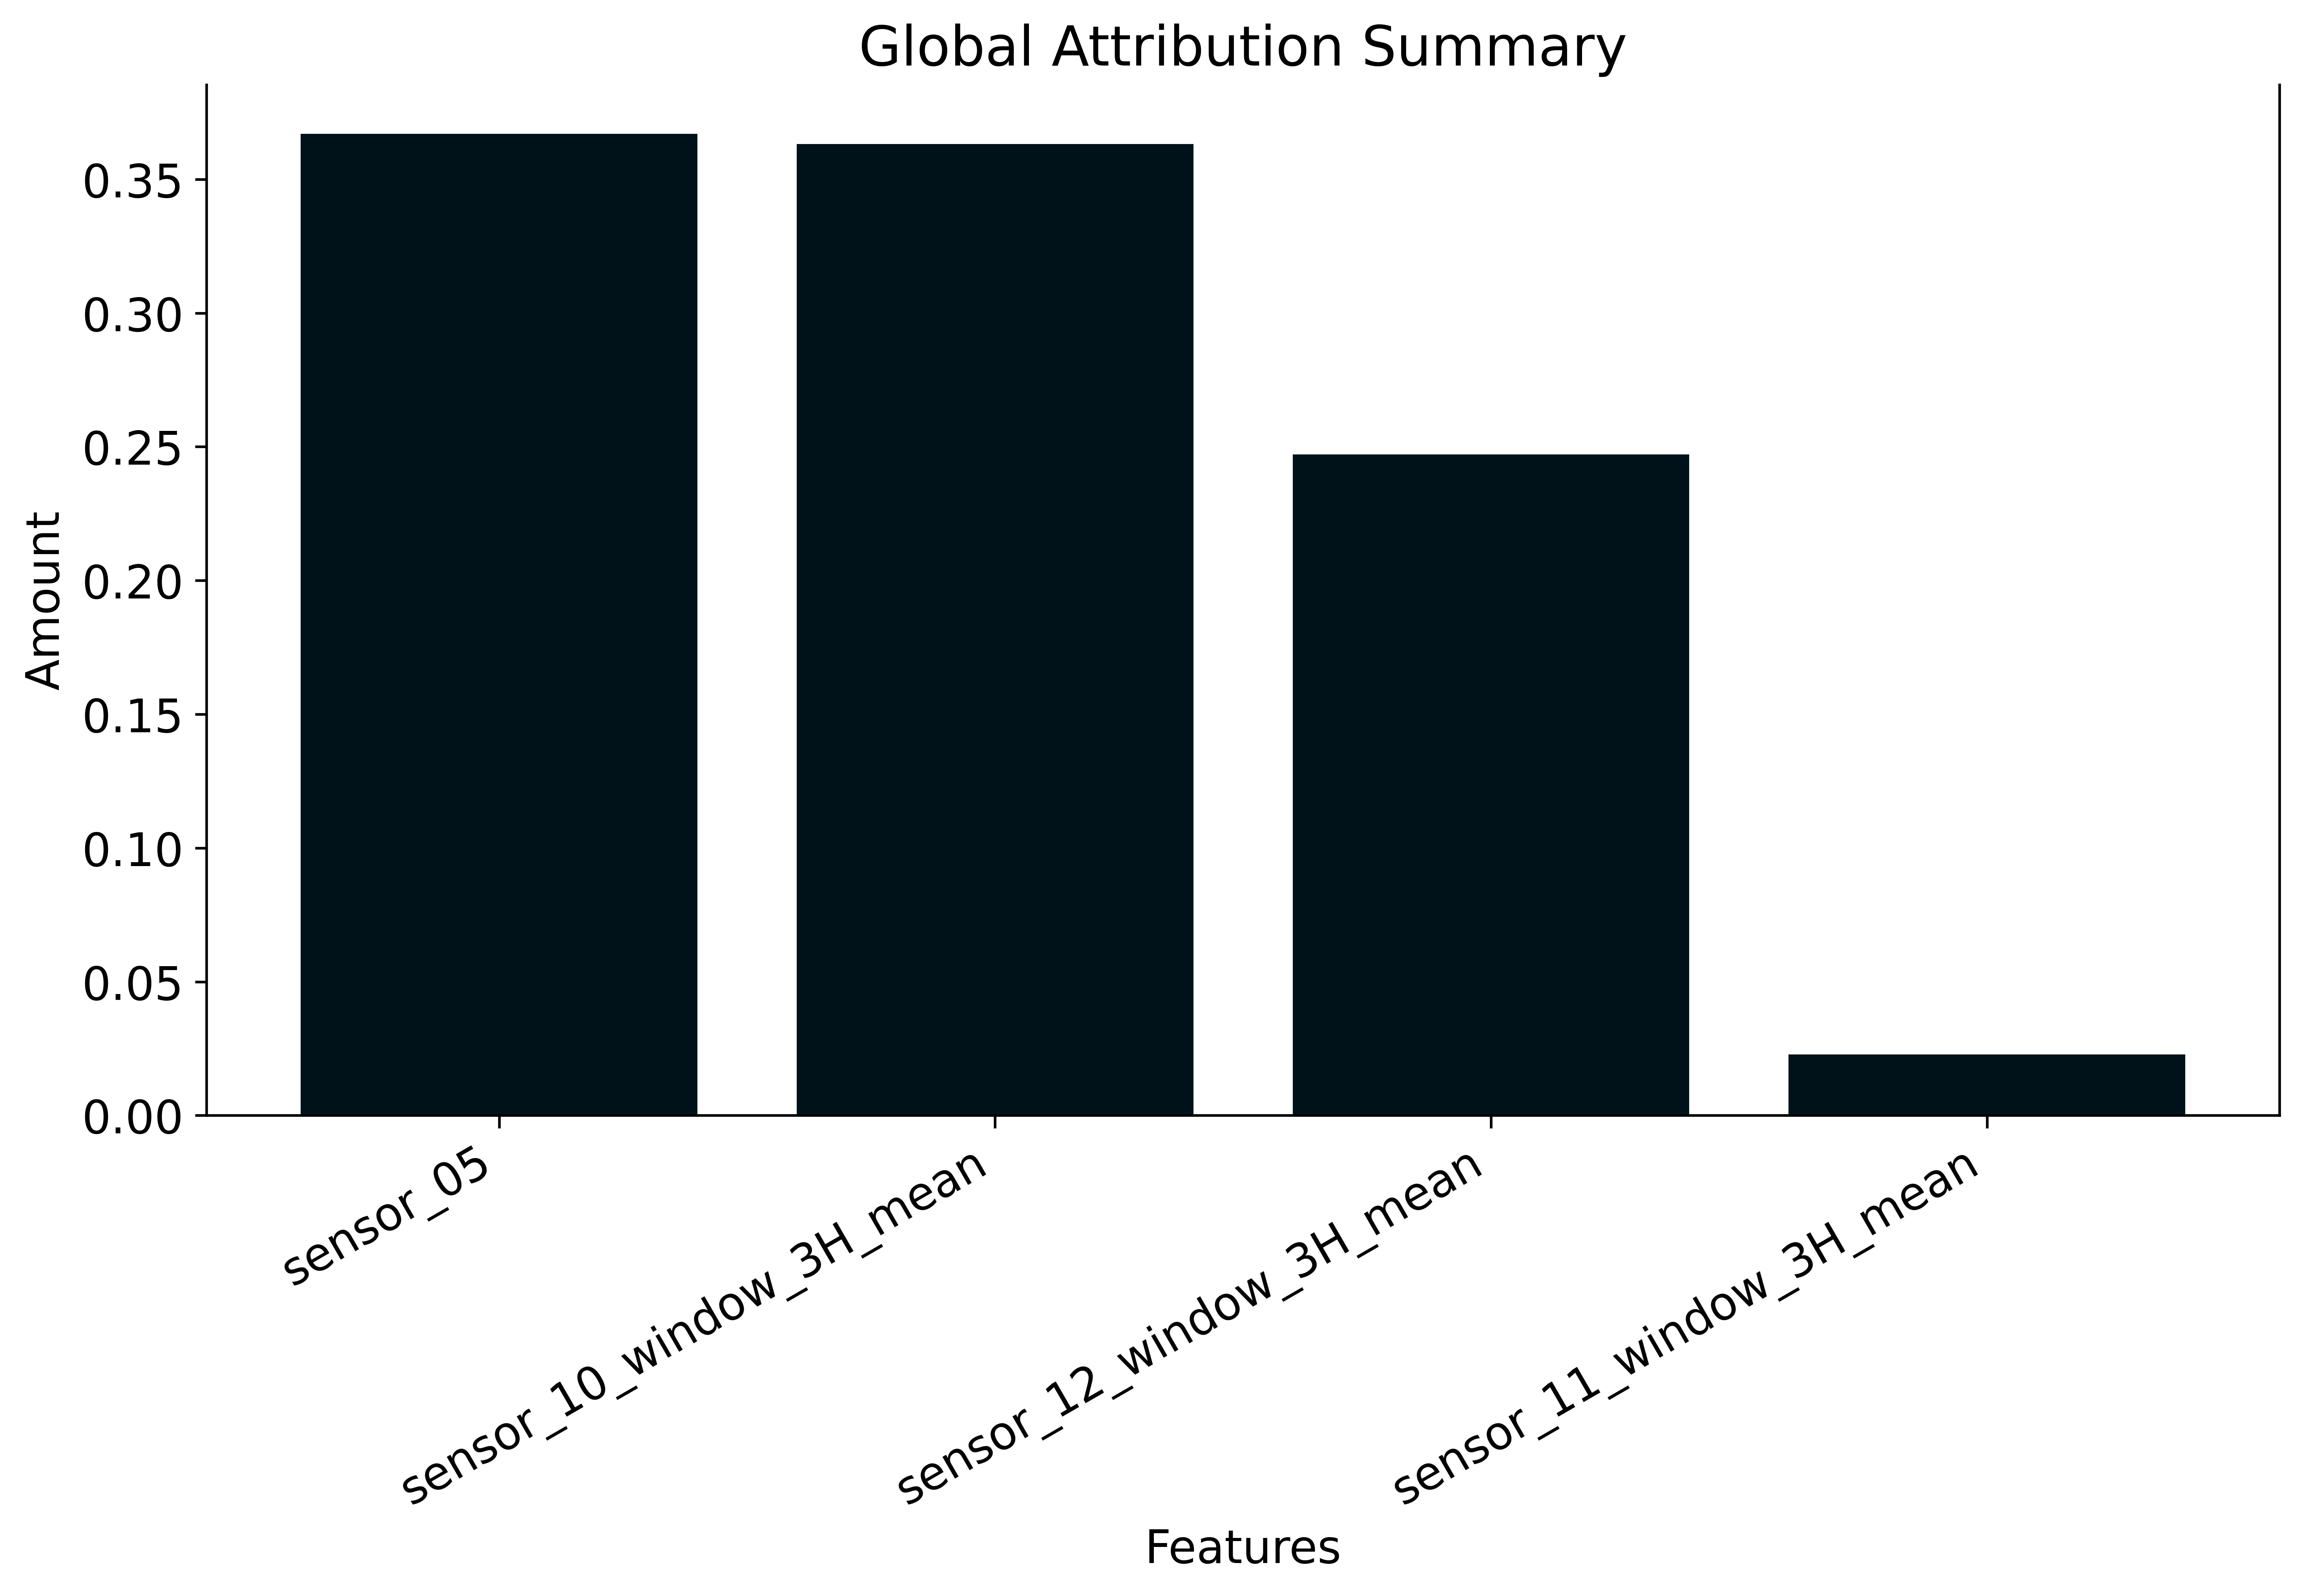

In [89]:
# # Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(range(len(global_importance.summary_importance)), 
        list(global_importance.summary_importance.values())/(np.sum(list(global_importance.summary_importance.values()))), 
        tick_label=list(global_importance.summary_importance.keys()))
plt.ylabel('Amount')
plt.xlabel('Features')
ax.set_title("Global Attribution Summary")
# make x-axis ticks legible
fig = plt.gcf()
fig.autofmt_xdate()  # auto format data
plt.show()